In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # for ignoring warning
warnings.filterwarnings('ignore')

# Loading dataset
******************************

In [4]:
df=pd.read_csv('hotel_bookings.csv')

#since it is in the same folder

# EDA & Data Cleaning
**************************************

In [5]:
df.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,22/4/2015


In [6]:
df.shape

(119390, 32)

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [11]:
df.describe(include='object') 

# although describe is only used for integer but on using include it give description for object

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [12]:
# SEE WHAT ALL UNIQUE VALUES ARE THERE IN OBJECT TYPE COLUMNS

for col in df.describe(include='object').columns: # we'LL GET ALL THE COLUMNS WHICH ARE OF OBJECT DATA TYPE
    print(col)
    print('-'*10)
    print(df[col].unique())
    print('#'*80)
   

hotel
----------
['Resort Hotel' 'City Hotel']
################################################################################
arrival_date_month
----------
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
################################################################################
meal
----------
['BB' 'FB' 'HB' 'SC' 'Undefined']
################################################################################
country
----------
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'P

In [13]:
df.isnull().sum()

# IT RETURNS THE TOTAL NUMBER OF NULL VALUES

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
#SINCE DATA IS TOO LARGE, REMOVING COMPANY & AGENT WOULD BE WISE AS THEY WOULDNT BE ABLE TO HANDLE IT.
# REMOVING 488 ROWS OF COUNTRY WHERE VALUE IS NULL WOULD BE OKAY - AS TOTAL RECORDS ARE 

In [15]:
df.drop(['company','agent'],axis=1,inplace=True)
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [17]:
df.describe() 

# it gives summary of numerical columns

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


*******************************************************************************************************************************

OUTLIERS : 

1. children and babies - 10, 10,0 , 0 ,0 not possible.
2. 5400 MAX for adr is too an outlier. - It can be removed for better analysis 

*******************************************************************************************************************************

<AxesSubplot: >

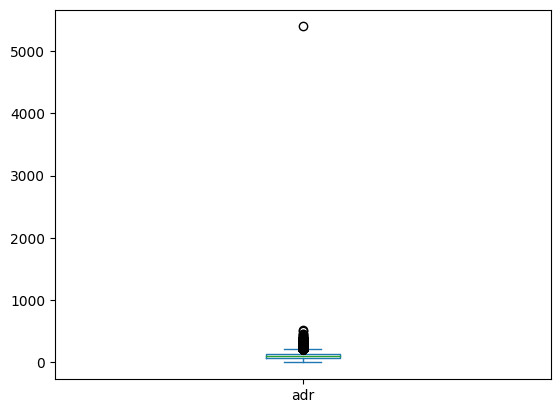

In [18]:
df['adr'].plot(kind='box')

In [19]:
df= df[df['adr']<5000]

In [20]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


*******************************************************************************************************************************

OUTLIERS : 

1. Now adr max value is 510 - really really less than 5000 

*******************************************************************************************************************************

# DATA ANALYSIS AND VISULISATION
**************************************

## % Cancellation

In [21]:
cancelled_perc=df['is_canceled'].value_counts(normalize = True)

In [22]:
print(cancelled_perc)

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


<BarContainer object of 2 artists>

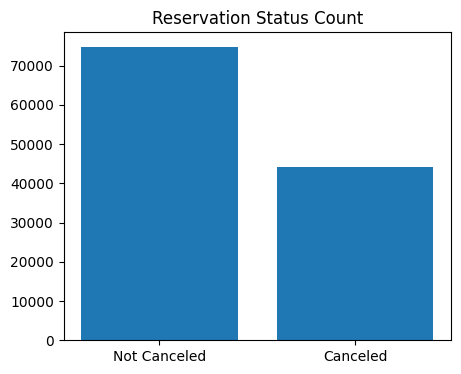

In [23]:
plt.figure(figsize=(5,4))
plt.title("Reservation Status Count")
plt.bar(['Not Canceled','Canceled'],df['is_canceled'].value_counts())

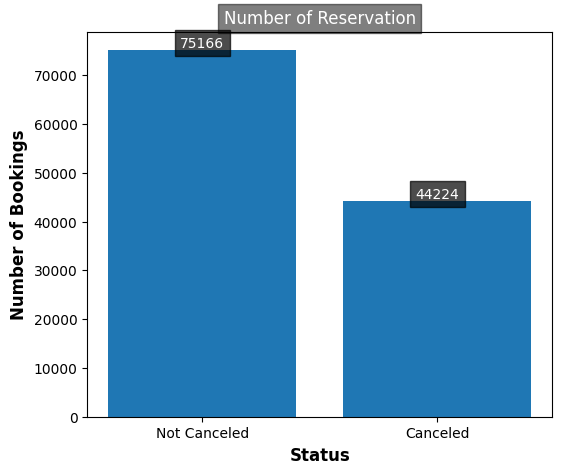

In [237]:
# Create the bar plot
plt.figure(figsize=(6, 5))
plt.title("Number of Reservation",color="White",bbox={'facecolor':'black', 'alpha':0.5})
bars = plt.bar(['Not Canceled', 'Canceled'], df['is_canceled'].value_counts())
plt.xlabel('Status', fontsize=12, fontweight='bold')
plt.ylabel('Number of Bookings', fontsize=12, fontweight='bold')

# Add data labels with dark background box
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width()/2
    
    plt.text(xval, yval, f'{round(yval)}', va='bottom', ha='center', color='white', bbox=dict(facecolor='black', alpha=0.7))

plt.show()

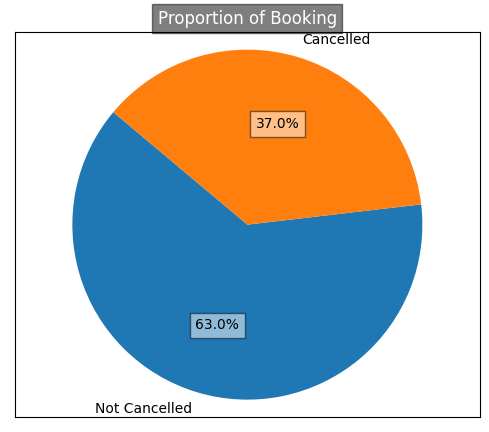

In [246]:
# CHATGPT RESPONSE

# I WANT TO CREATE A PIE CHART named " Booking Status" FOR 'is_canceled' values
# give the data labels and legends.
# 0 - Not cancelled
# 1 - Cancelled

# Legends should be in a black box enclosing

# entire visual should be in a box.
# it should have a bold and modern looking title
# colours should also be modern

# chart is not enclosed in a box

#######################################################################################

# Data
booking_status_labels = ['Not Cancelled', 'Cancelled']
booking_status_counts = [df['is_canceled'].value_counts()[0], df['is_canceled'].value_counts()[1]]

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
patches, texts, autotexts = ax.pie(booking_status_counts, labels=booking_status_labels, autopct='%1.1f%%',
                                   startangle=140)

# Highlight data labels with a dark box
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='WHITE', alpha=0.5, edgecolor='black'))



# Bold and modern title
ax.set_title("Proportion of Booking",color="White",bbox={'facecolor':'black', 'alpha':0.5})

# Enclosing the entire visual in a box
plt.box(on=None)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

*******************************************************************************************************************************

CONCLUSION

1. ALMOST 40% CANCELS THEIR BOOKINGS 

*******************************************************************************************************************************

NameError: name 'bbox_to_anchor' is not defined

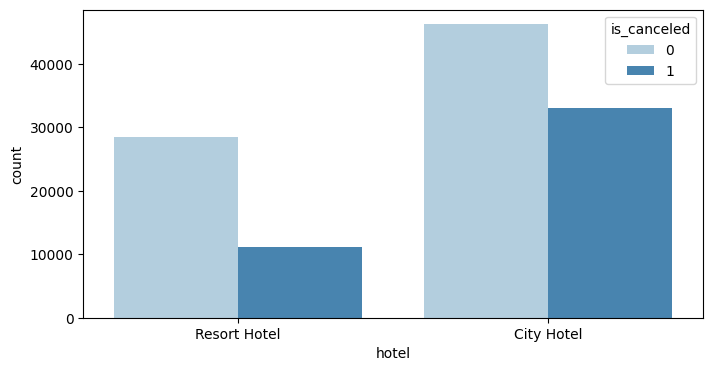

In [26]:
plt.figure(figsize = (8,4))
ax1=sns.countplot(x='hotel',hue='is_canceled', data=df, palette = 'Blues')
legend_labels= ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor(1,1))
plt.title("Reservation status in different hotels",size=20)
plt.xlabel("Hotel")
plt.ylabel("Number of Reservations")
plt.show()

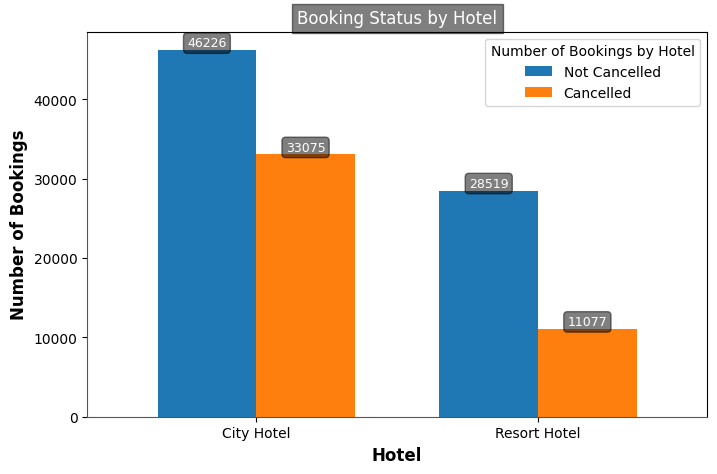

In [184]:
# CHAT GPT PROMPT : 

# give me a cluster column chart for
# hotels wise booking status.
# instructions - 

# hotel name on X-axis - sub bars for 0 - "Not Cancelled" /1 - "Cancelled"
# and number of bookings on Y axis
# chart should be well labaled

# chart should be well labaled

# entire visual should be in a box.
# it should have a bold and modern looking title
# colours should also be modern

# data label should be boxed in dark box

# X axis labels should aligh horizontally


# Data
hotel_booking_status = df.groupby(['hotel', 'is_canceled']).size().unstack(fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(8,5))
hotel_booking_status.plot(kind='bar', stacked=False, ax=ax, width=0.7)

# Customizing labels and title
ax.set_title('Booking Status by Hotel',color="White",bbox={'facecolor':'black', 'alpha':0.5})
ax.set_xlabel('Hotel', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Bookings', fontsize=12, fontweight='bold')

# Customizing legend
ax.legend(title='Number of Bookings by Hotel', labels=['Not Cancelled', 'Cancelled'], loc='upper right')

# Adding labels to each bar with a dark box
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', fc='black', alpha=0.5),
                fontsize=9,
                color='white')

# Aligning x-axis labels horizontally
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Enclosing the entire visual in a box
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_color('#555555')
ax.spines['left'].set_color('#555555')



# Show plot
plt.show()

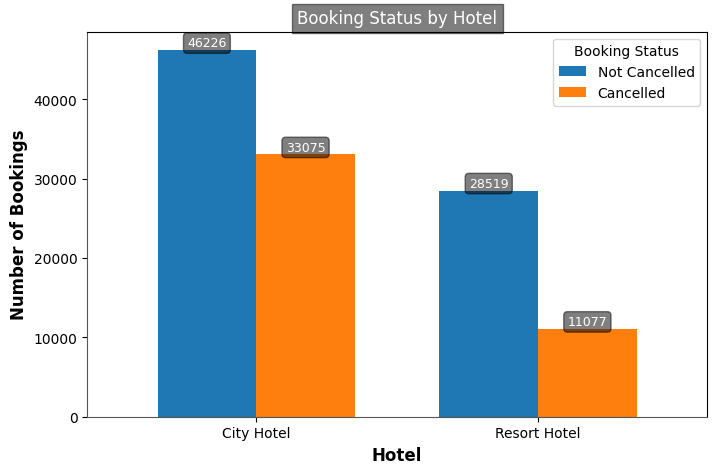

In [186]:
# CHAT GPT PROMPT : 

# give me a cluster column chart for
# hotels wise booking status.
# instructions - 

# hotel name on X-axis - sub bars for 0 - "Not Cancelled" /1 - "Cancelled"
# and number of bookings on Y axis
# chart should be well labaled

# chart should be well labaled

# entire visual should be in a box.
# it should have a bold and modern looking title
# colours should also be modern

# data label should be boxed in dark box

# X axis labels should aligh horizontally


# Data
hotel_booking_status = df.groupby(['hotel', 'is_canceled']).size().unstack(fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(8,5))
hotel_booking_status.plot(kind='bar', stacked=False, ax=ax, width=0.7)

# Customizing labels and title
ax.set_title('Booking Status by Hotel',color="White",bbox={'facecolor':'black', 'alpha':0.5})
ax.set_xlabel('Hotel', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Bookings', fontsize=12, fontweight='bold')

# Customizing legend
ax.legend(title='Booking Status', labels=['Not Cancelled', 'Cancelled'], loc='upper right')

# Adding labels to each bar with a dark box
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', fc='black', alpha=0.5),
                fontsize=9,
                color='white')

# Aligning x-axis labels horizontally
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Enclosing the entire visual in a box
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_color('#555555')
ax.spines['left'].set_color('#555555')



# Show plot
plt.show()

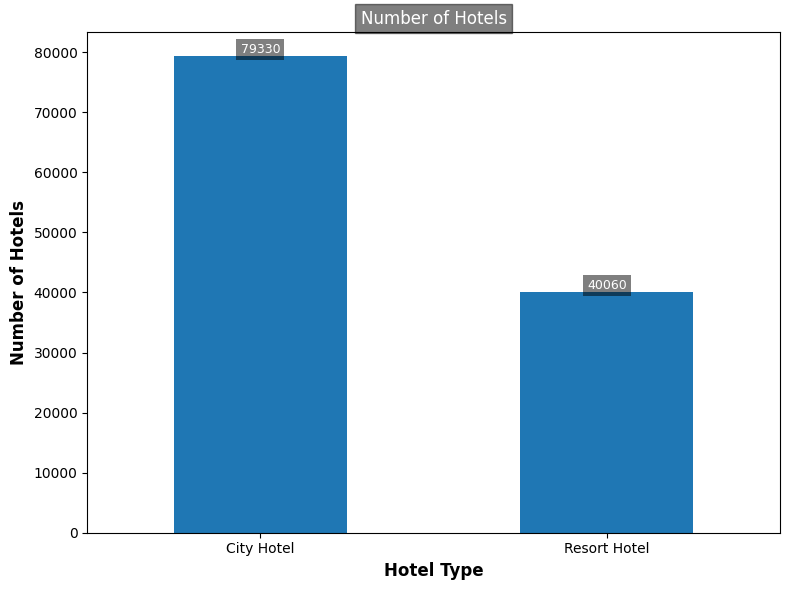

In [255]:
import matplotlib.pyplot as plt

# Count the number of resort hotels and city hotels
hotel_counts = df['hotel'].value_counts()



# Plot the counts in a bar chart
plt.figure(figsize=(8, 6))
hotel_counts.plot(kind='bar')
plt.title('Number of Hotels',color="White",bbox={'facecolor':'black', 'alpha':0.5})
plt.xlabel('Hotel Type', fontsize=12, fontweight='bold')
plt.ylabel('Number of Hotels',fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

# Add data labels with dark box
for i, count in enumerate(hotel_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=9,
             bbox=dict(facecolor='black', alpha=0.5, pad=3, edgecolor='none'), color='white')


plt.tight_layout()
plt.show()


In [31]:
resort_hotel= df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [32]:
city_hotel= df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

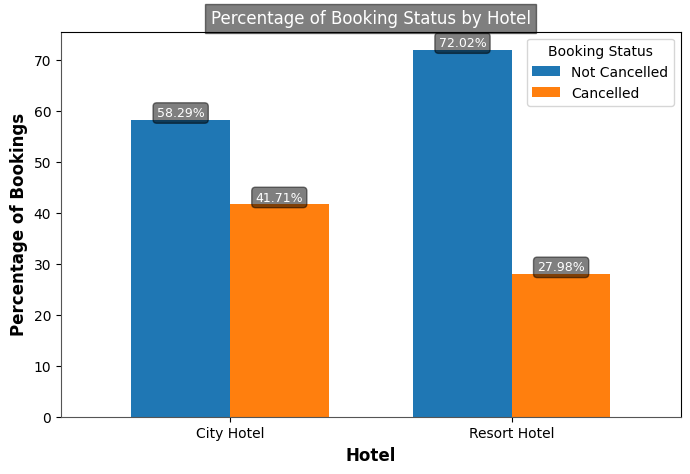

In [119]:
# Calculate total bookings by hotel
total_bookings_by_hotel = hotel_booking_status.sum(axis=1)

# Calculate percentage of bookings for each hotel
percentage_booking_status = hotel_booking_status.div(total_bookings_by_hotel, axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(8,5))
percentage_booking_status.plot(kind='bar', stacked=False, ax=ax, width=0.7)

# Customizing labels and title
ax.set_title('Percentage of Booking Status by Hotel', color="White", bbox={'facecolor':'black', 'alpha':0.5})
ax.set_xlabel('Hotel', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage of Bookings', fontsize=12, fontweight='bold')

# Customizing legend
ax.legend(title='Booking Status', labels=['Not Cancelled', 'Cancelled'], loc='upper right')

# Adding labels to each bar with a dark box
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', fc='black', alpha=0.5),
                fontsize=9,
                color='white')

# Aligning x-axis labels horizontally
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Enclosing the entire visual in a box
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_color('#555555')
ax.spines['left'].set_color('#555555')

# Show plot
plt.show()


In [33]:
resort_hotel=resort_hotel.groupby('reservation_status_date')['adr'].mean()
city_hotel=city_hotel.groupby('reservation_status_date')['adr'].mean()

KeyError: 'adr'

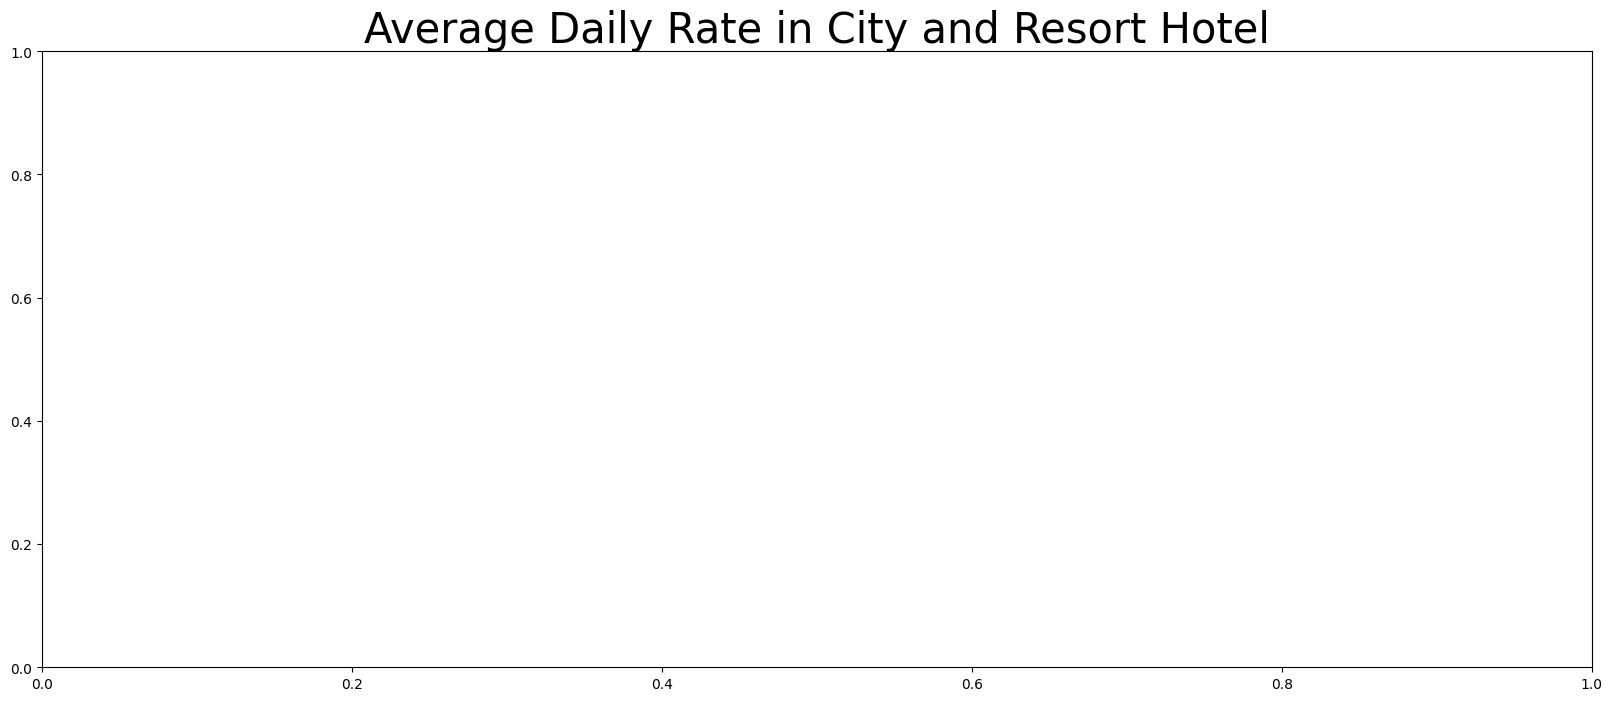

In [34]:
# CHECK WEATHER PRICE IS A FACTOR FOR CANCELLATION

plt.figure(figsize=(20,8))
plt.title("Average Daily Rate in City and Resort Hotel",fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='city_hotel')
plt.legend(fontsize=20)
plt.show()




In [35]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-03-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-03-07
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-06-05
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22


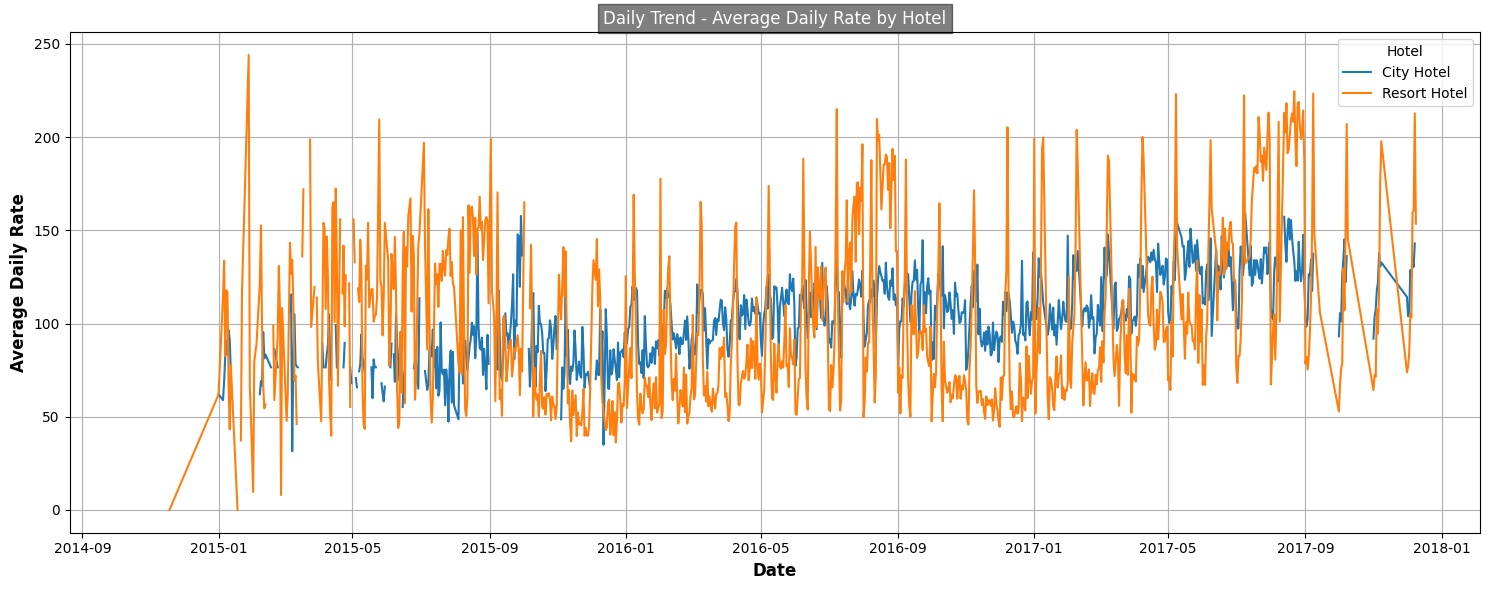

In [183]:
# CHATGPT RESPONSE

# give me a line chart for average daily rate for hotel by name in single graph

# instruction:

# take mean of adr by dates

#######################################################################################





# Convert 'reservation_status_date' column to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Group by hotel and date, calculate mean ADR
adr_by_hotel_date = df.groupby(['hotel', 'reservation_status_date'])['adr'].mean().unstack(level=0)

# Plot
plt.figure(figsize=(15, 6))
for hotel in adr_by_hotel_date.columns:
    plt.plot(adr_by_hotel_date.index, adr_by_hotel_date[hotel], label=hotel)

# Customizing labels and title
plt.title('Daily Trend - Average Daily Rate by Hotel', color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Average Daily Rate', fontsize=12, fontweight='bold')

# Customizing legend
plt.legend(title='Hotel', loc='upper right')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

*******************************************************************************************************************************

CONCLUSION

1. It shows price of resort > city. Therefore more cancellations in resort than city. 
2. Weekend has higher price for both variety of hotels
3.

*******************************************************************************************************************************

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


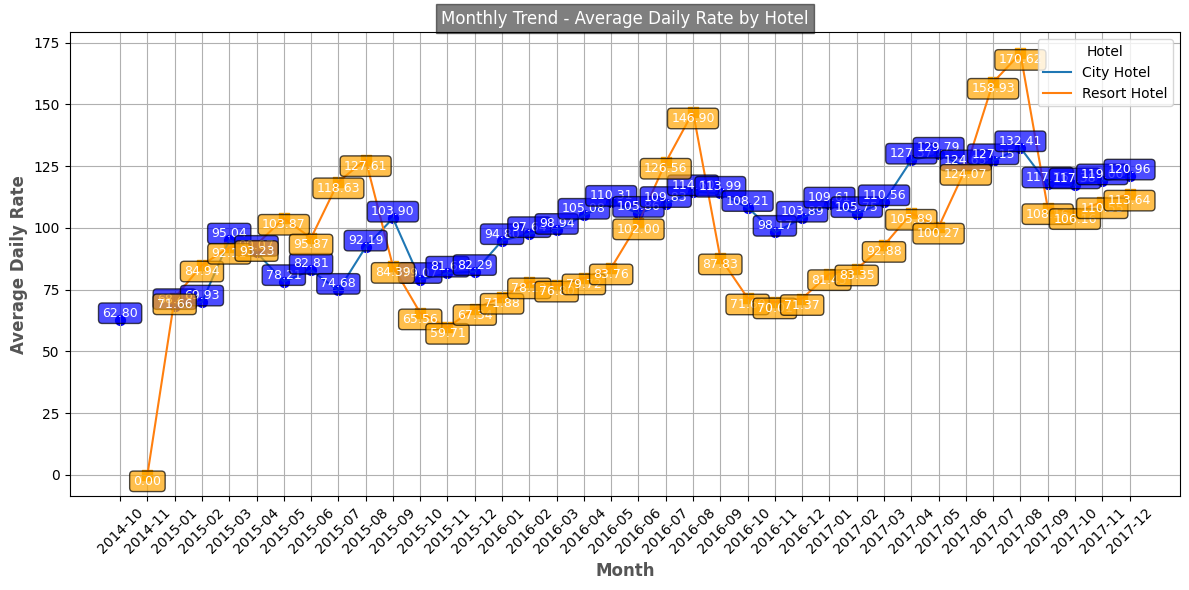

In [128]:
# CHATGPT RESPONSE


#######################################################################################



# Convert 'reservation_status_date' column to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract month and year from the date
df['month_year'] = df['reservation_status_date'].dt.to_period('M').astype(str)

# Group by hotel and month_year, calculate mean ADR
monthly_adr_by_hotel = df.groupby(['hotel', 'month_year'])['adr'].mean().unstack(level=0)

# Plot
plt.figure(figsize=(12, 6))
for hotel in monthly_adr_by_hotel.columns:
    plt.plot(monthly_adr_by_hotel.index, monthly_adr_by_hotel[hotel], label=hotel)

    # Adding data pointers
    if hotel == 'City Hotel':
        plt.scatter(monthly_adr_by_hotel.index, monthly_adr_by_hotel[hotel], s=50, color='blue', marker='o')
    elif hotel == 'Resort Hotel':
        plt.scatter(monthly_adr_by_hotel.index, monthly_adr_by_hotel[hotel], s=50, color='orange', marker='s')

# Adding labels to each point with a colored box
for hotel in monthly_adr_by_hotel.columns:
    for i, adr in enumerate(monthly_adr_by_hotel[hotel]):
        if hotel == 'City Hotel':
            plt.text(i, adr, f'{adr:.2f}', color='white', fontsize=9, ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.3', fc='blue', alpha=0.7))
        elif hotel == 'Resort Hotel':
            plt.text(i, adr, f'{adr:.2f}', color='white', fontsize=9, ha='center', va='top', bbox=dict(boxstyle='round,pad=0.3', fc='orange', alpha=0.7))

# Customizing labels and title
plt.title('Monthly Trend - Average Daily Rate by Hotel', color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.xlabel('Month', fontsize=12, fontweight='bold', color='#555555')
plt.ylabel('Average Daily Rate', fontsize=12, fontweight='bold', color='#555555')

# Customizing legend
plt.legend(title='Hotel', loc='upper right')

# Set x-axis ticks angle
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

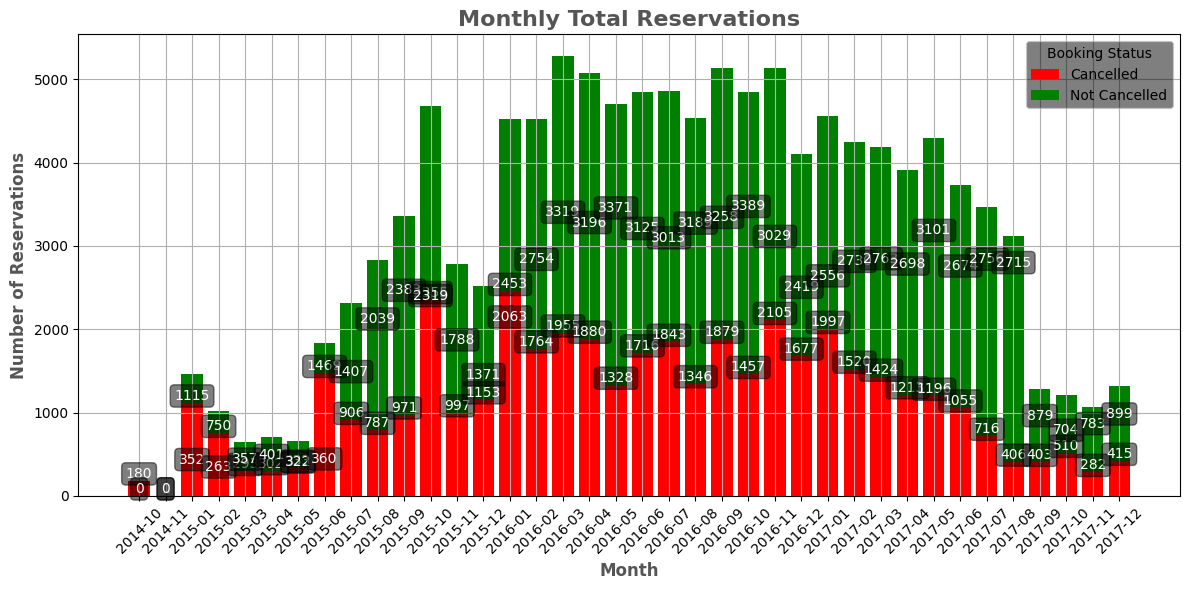

In [41]:
# Convert 'reservation_status_date' column to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract month and year from the date
df['month_year'] = df['reservation_status_date'].dt.to_period('M')

# Group by month and is_canceled, calculate total reservations
monthly_reservations = df.groupby(['month_year', 'is_canceled']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
bars_cancelled = plt.bar(monthly_reservations.index.astype(str), monthly_reservations[1], color='red', label='Cancelled')
bars_not_cancelled = plt.bar(monthly_reservations.index.astype(str), monthly_reservations[0], bottom=monthly_reservations[1], color='green', label='Not Cancelled')

# Adding data labels
for bar in bars_cancelled + bars_not_cancelled:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.3', fc='black', alpha=0.5), color='white')

# Customizing labels and title
plt.title('Monthly Total Reservations', fontsize=16, fontweight='bold', color='#555555')
plt.xlabel('Month', fontsize=12, fontweight='bold', color='#555555')
plt.ylabel('Number of Reservations', fontsize=12, fontweight='bold', color='#555555')

# Customizing legend
plt.legend(title='Booking Status', loc='upper right', facecolor='black', framealpha=0.5)

# Show plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

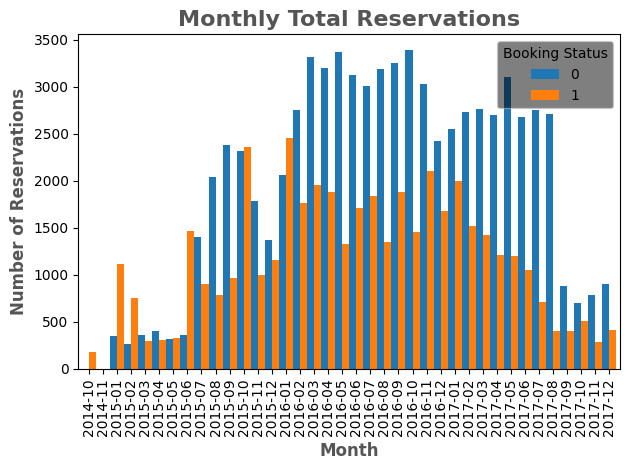

In [42]:
# Convert 'reservation_status_date' column to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract month and year from the date
df['month_year'] = df['reservation_status_date'].dt.to_period('M').astype(str)

# Group by month_year and is_canceled, calculate total reservations
monthly_reservations = df.groupby(['month_year', 'is_canceled']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(20, 8))  # Adjusted figsize
monthly_reservations.plot(kind='bar', stacked=False, width=1)  # Increased width for more space between bars


# Customizing labels and title
plt.title('Monthly Total Reservations', fontsize=16, fontweight='bold', color='#555555')
plt.xlabel('Month', fontsize=12, fontweight='bold', color='#555555')
plt.ylabel('Number of Reservations', fontsize=12, fontweight='bold', color='#555555')

# Customizing legend
plt.legend(title='Booking Status', loc='upper right', facecolor='black', framealpha=0.5)

# Hide grid
plt.grid(False)

# Show plot
plt.tight_layout()
plt.show()

*******************************************************************************************************************************

CONCLUSION

1. Most cancellations are in month of JAN, AUGUST
2. MONTHS WITH LESS RESERVATIONS HAVE HIGHER CANCELLATIONS

IT GIVES VERY CONFUSING - HOW CAN BE CANCELLATION BE MORE WHEN BOOKING IS LESS ?

LETS ANALYSE THE PRICES


*******************************************************************************************************************************

# code


plt.title('Monthly Total Reservations', color="White", bbox={'facecolor':'black', 'alpha':0.5})

plt.xlabel('Month', fontsize=12, fontweight='bold', color='#555555')

plt.ylabel('Number of Reservations', fontsize=12, fontweight='bold', color='#555555')

<Figure size 1200x600 with 0 Axes>

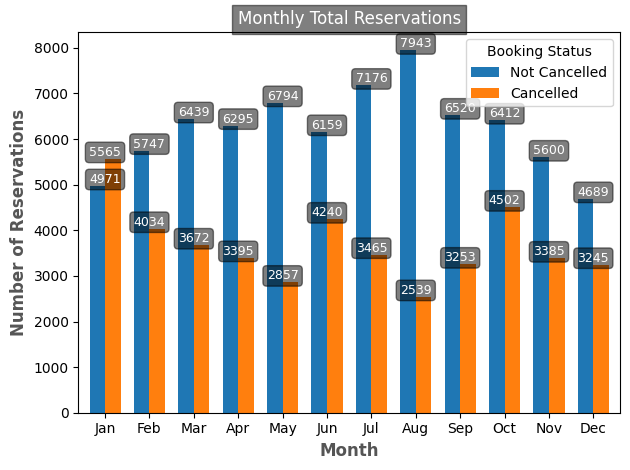

In [146]:
import calendar

# Convert 'reservation_status_date' column to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract month from the date
df['month'] = df['reservation_status_date'].dt.month

# Group by month and is_canceled, calculate total reservations
monthly_reservations = df.groupby(['month', 'is_canceled']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
ax = monthly_reservations.plot(kind='bar', stacked=False, width=0.7)

# Adding labels to each bar with a dark box
for i in range(len(monthly_reservations.index)):
    for j in range(len(monthly_reservations.columns)):
        count = monthly_reservations.iloc[i, j]
        plt.text(i, count, str(count), ha='center', va='bottom', fontsize=9, bbox=dict(boxstyle='round,pad=0.3', fc='black', alpha=0.5), color='white')

# Customizing labels and title
plt.title('Monthly Total Reservations', color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.xlabel('Month', fontsize=12, fontweight='bold', color='#555555')
plt.ylabel('Number of Reservations', fontsize=12, fontweight='bold', color='#555555')

# Customizing legend
plt.legend(title='Booking Status', labels=['Not Cancelled', 'Cancelled'], loc='upper right')

# Hide grid
plt.grid(False)

# Setting month names as x-axis labels
ax.set_xticklabels([calendar.month_abbr[m] for m in range(1, 13)], rotation=0)  # Setting rotation to 0 for horizontal labels

# Show plot
plt.tight_layout()
plt.show()


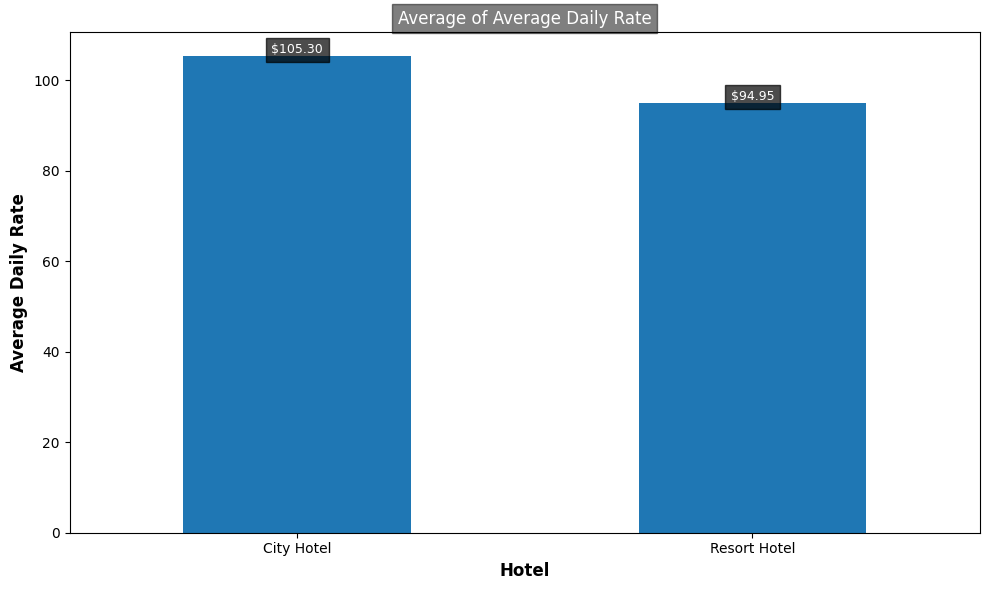

In [259]:
import matplotlib.pyplot as plt

# Calculate average daily rate for each hotel
avg_daily_rate = df.groupby('hotel')['adr'].mean()

# Plotting the bar chart with thinner bars
plt.figure(figsize=(10, 6))
ax = avg_daily_rate.plot(kind='bar', width=0.5)  # Adjust width to make bars thinner

# Adding data labels with dark color in a box
for i, rate in enumerate(avg_daily_rate):
    plt.text(i, rate, f"${rate:.2f}", ha='center', va='bottom', fontsize=9, color='white',
             bbox=dict(facecolor='black', alpha=0.7))  # Dark box for data labels

# Customizing labels and title
plt.title('Average of Average Daily Rate', color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.xlabel('Hotel', fontsize=12, fontweight='bold')
plt.ylabel('Average Daily Rate', fontsize=12, fontweight='bold')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Hide grid
plt.grid(False)

# Show plot
plt.tight_layout()
plt.show()


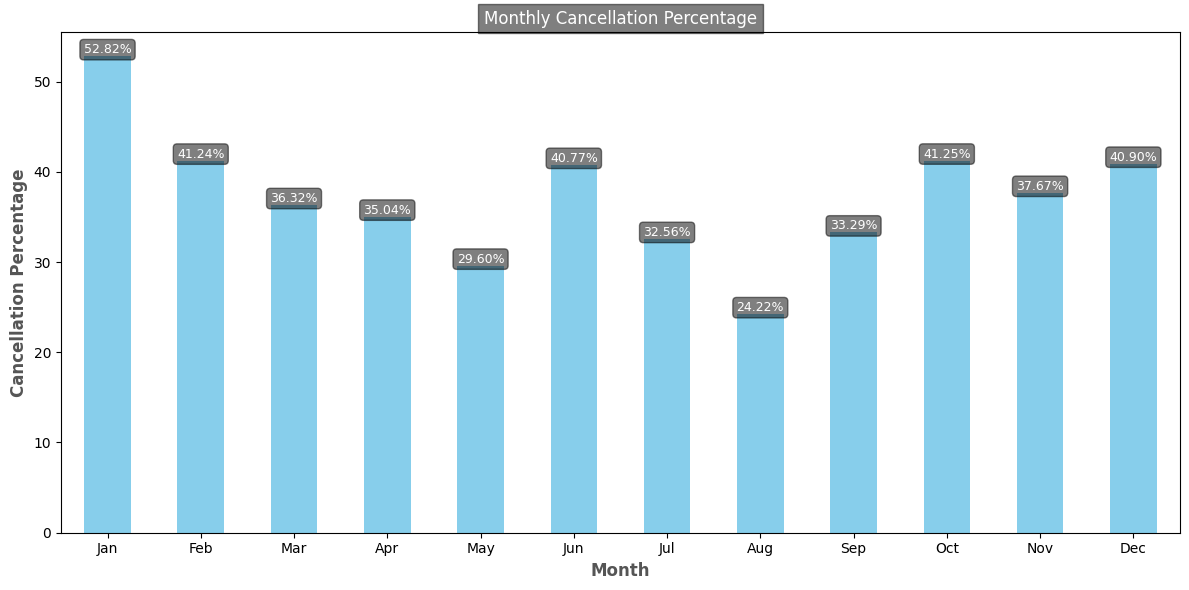

In [204]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'reservation_status_date' column to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract month from the date
df['month'] = df['reservation_status_date'].dt.month

# Group by month and is_canceled, calculate total reservations
monthly_reservations = df.groupby('month')['is_canceled'].value_counts().unstack(fill_value=0)

# Calculate percentage of cancellations
monthly_reservations['Cancellation Percentage'] = (monthly_reservations[1] / (monthly_reservations[0] + monthly_reservations[1])) * 100

# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = monthly_reservations['Cancellation Percentage'].plot(kind='bar', color='skyblue')

# Adding data labels
for i, count in enumerate(monthly_reservations['Cancellation Percentage']):
    plt.text(i, count, f"{count:.2f}%", ha='center', va='bottom', fontsize=9, bbox=dict(boxstyle='round,pad=0.3', fc='black', alpha=0.5), color='white')

# Customizing labels and title
plt.title('Monthly Cancellation Percentage', color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.xlabel('Month', fontsize=12, fontweight='bold', color='#555555')
plt.ylabel('Cancellation Percentage', fontsize=12, fontweight='bold', color='#555555')

# Hide grid
plt.grid(False)

# Setting month names as x-axis labels
ax.set_xticklabels([calendar.month_abbr[m] for m in range(1, 13)], rotation=0)  # Setting rotation to 0 for horizontal labels

# Show plot
plt.tight_layout()
plt.show()


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118897 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118897 non-null  object        
 1   is_canceled                     118897 non-null  int64         
 2   lead_time                       118897 non-null  int64         
 3   arrival_date_year               118897 non-null  int64         
 4   arrival_date_month              118897 non-null  object        
 5   arrival_date_week_number        118897 non-null  int64         
 6   arrival_date_day_of_month       118897 non-null  int64         
 7   stays_in_weekend_nights         118897 non-null  int64         
 8   stays_in_week_nights            118897 non-null  int64         
 9   adults                          118897 non-null  int64         
 10  children                        118897 non-null  float64

<Figure size 1200x600 with 0 Axes>

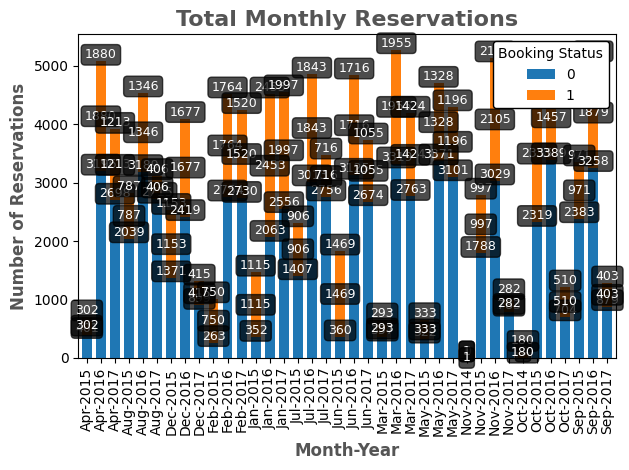

In [45]:
import matplotlib.pyplot as plt

# Convert 'reservation_status_date' column to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract month and year from the date
df['month_year'] = df['reservation_status_date'].dt.strftime('%b-%Y')

# Group by month_year and is_canceled, calculate total reservations
monthly_reservations = df.groupby(['month_year', 'is_canceled']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
monthly_reservations.plot(kind='bar', stacked=True, width=0.7)

# Adding labels to each bar with a dark box
for i in range(len(monthly_reservations.index)):
    total_reservations = 0
    for j in range(len(monthly_reservations.columns)):
        count = monthly_reservations.iloc[i, j]
        total_reservations += count
        plt.text(i, total_reservations, str(count), ha='center', va='bottom', fontsize=9, bbox=dict(boxstyle='round,pad=0.3', fc='black', alpha=0.7), color='white')
        if j == 1:  # Data label for sub-bar (is_canceled = 1)
            plt.text(i, total_reservations - count / 2, str(count), ha='center', va='center', fontsize=9, bbox=dict(boxstyle='round,pad=0.3', fc='black', alpha=0.7), color='white')

# Customizing labels and title
plt.title('Total Monthly Reservations', fontsize=16, fontweight='bold', color='#555555')
plt.xlabel('Month-Year', fontsize=12, fontweight='bold', color='#555555')
plt.ylabel('Number of Reservations', fontsize=12, fontweight='bold', color='#555555')

# Customizing legend
plt.legend(title='Booking Status', loc='upper right', facecolor='white', edgecolor='black', framealpha=1)

# Hide grid
plt.grid(False)

# Show plot
plt.tight_layout()
plt.show()


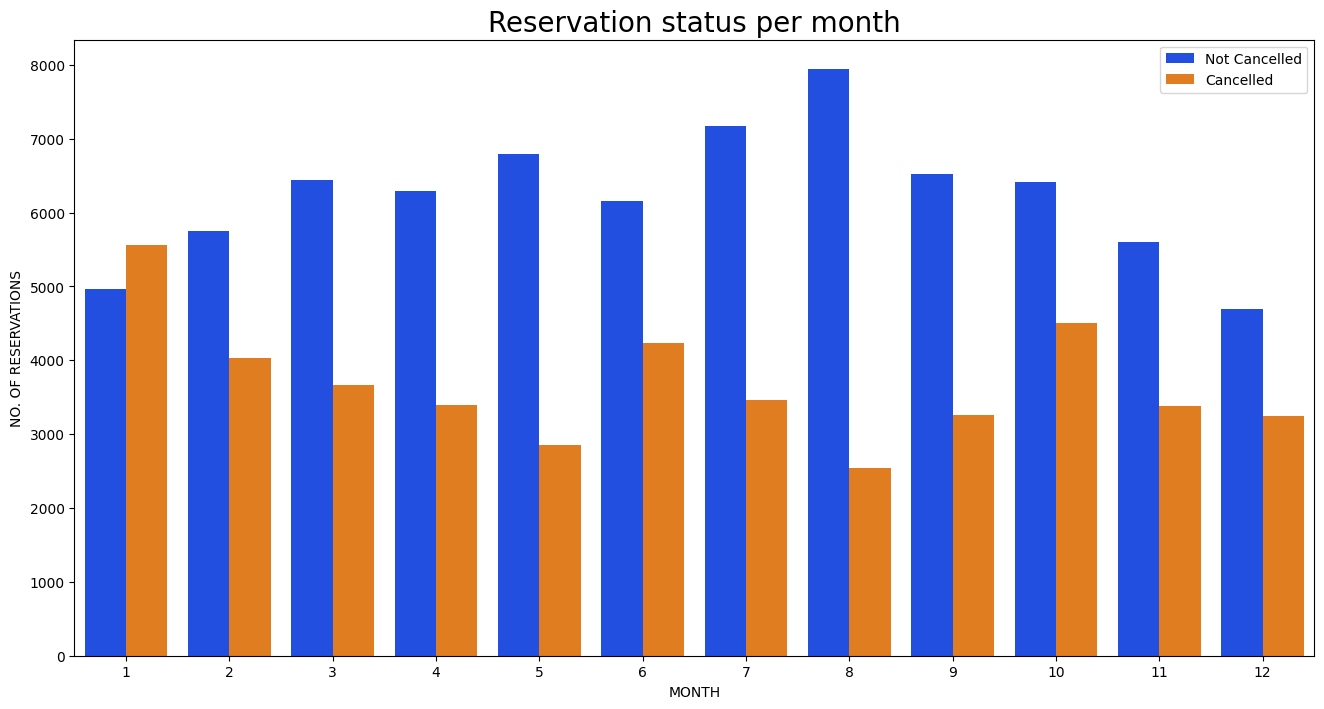

In [46]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month',hue='is_canceled',data=df,palette='bright')
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title("Reservation status per month",size=20)
plt.xlabel('MONTH')
plt.ylabel('NO. OF RESERVATIONS')
plt.legend(['Not Cancelled','Cancelled'])
plt.show()

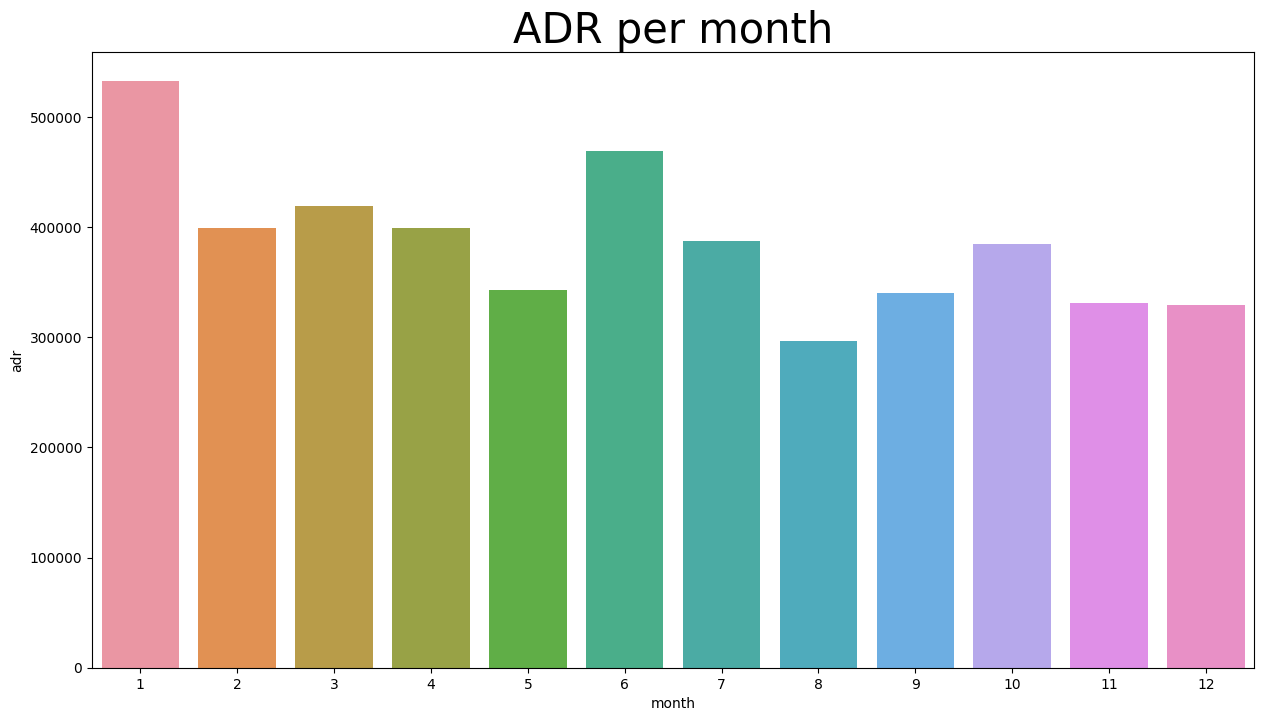

In [47]:
plt.figure(figsize=(15,8))
plt.title('ADR per month',fontsize=30)
sns.barplot(x='month', y='adr', data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


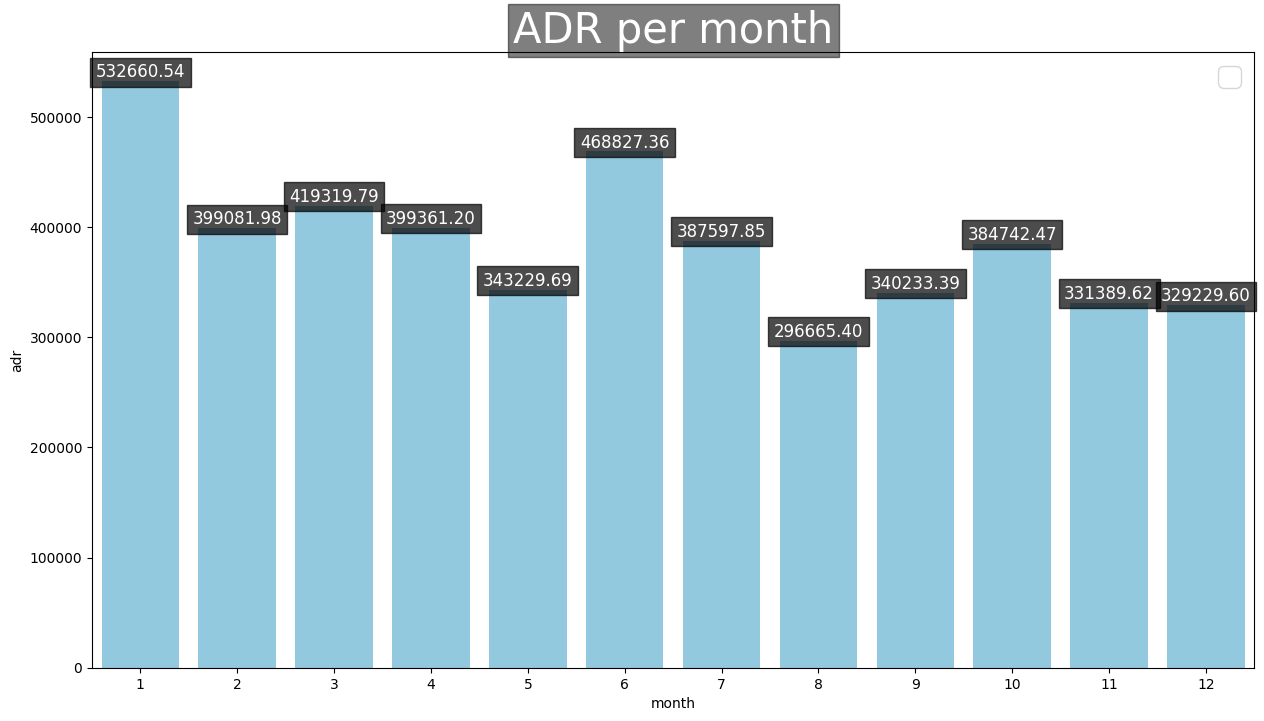

In [200]:
def add_data_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, '{:.2f}'.format(height),
                ha='center', va='bottom', fontsize=12, color='white',
                bbox=dict(facecolor='black', alpha=0.7))

plt.figure(figsize=(15, 8))
plt.title('ADR per month', fontsize=30, color="White", bbox={'facecolor':'black', 'alpha':0.5})
ax = sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index(),color='skyblue')
add_data_labels(ax)
plt.legend(fontsize=20)
plt.show()


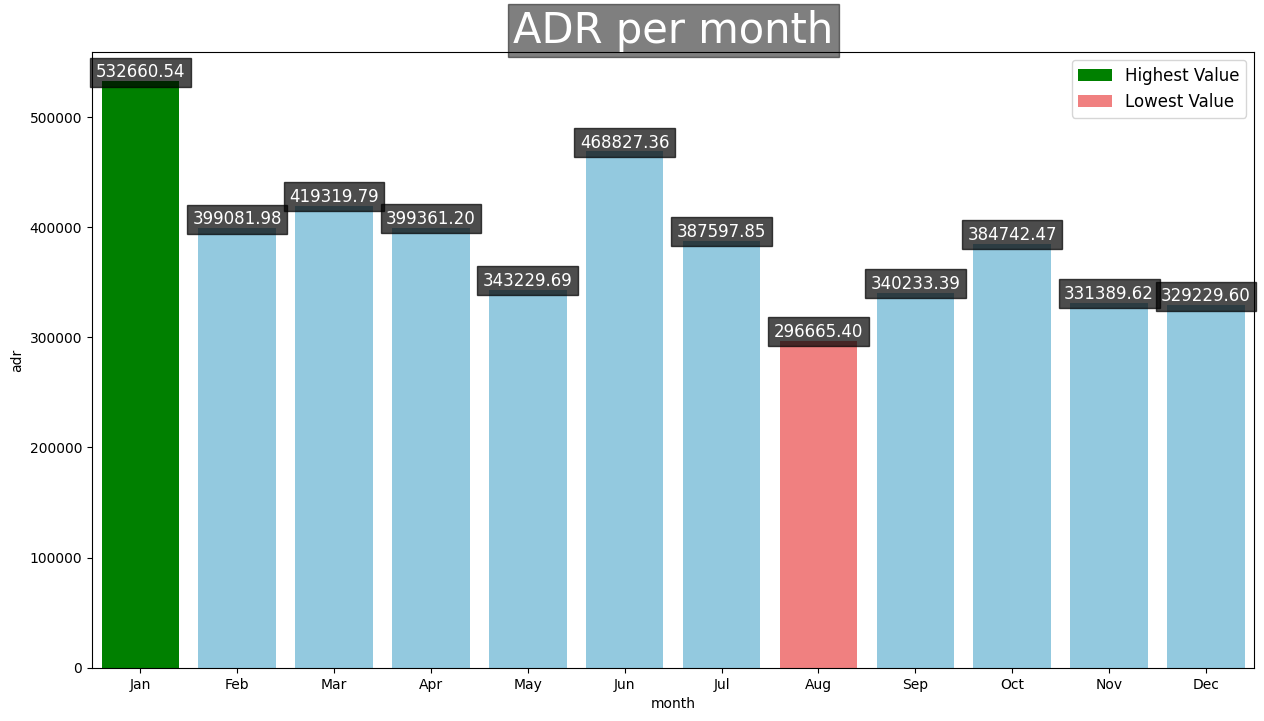

In [214]:
import calendar
import seaborn as sns

def add_data_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, '{:.2f}'.format(height),
                ha='center', va='bottom', fontsize=12, color='white',
                bbox=dict(facecolor='black', alpha=0.7))

# Plotting the bar chart
plt.figure(figsize=(15, 8))
plt.title('ADR per month', fontsize=30, color="White", bbox={'facecolor':'black', 'alpha':0.5})
ax = sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index(), color='skyblue')
add_data_labels(ax)

# Rename x-axis labels from 1 to 12 to represent January to December
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])

# Get the highest and lowest value bars
highest_value = max(ax.patches, key=lambda p: p.get_height())
lowest_value = min(ax.patches, key=lambda p: p.get_height())

# Color the highest value bar green and the lowest value bar light orange
highest_value.set_facecolor('green')
lowest_value.set_facecolor('lightcoral')

# Create the legend
legend_labels = ['Highest Value', 'Lowest Value']
legend_colors = ['green', 'lightcoral']
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='none') for color in legend_colors]
plt.legend(legend_patches, legend_labels, loc='best', fontsize=12)

plt.show()


*******************************************************************************************************************************

CONCLUSION

1. August ADR per month lowest - lowest cancellation
2. Jan ADR per month highest - Highest cancellation


*******************************************************************************************************************************

In [49]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year_month,month_year,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-01-07,2015-01,Jan-2015,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-01-07,2015-01,Jan-2015,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-02-07,2015-02,Feb-2015,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-02-07,2015-02,Feb-2015,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-03-07,2015-03,Mar-2015,3


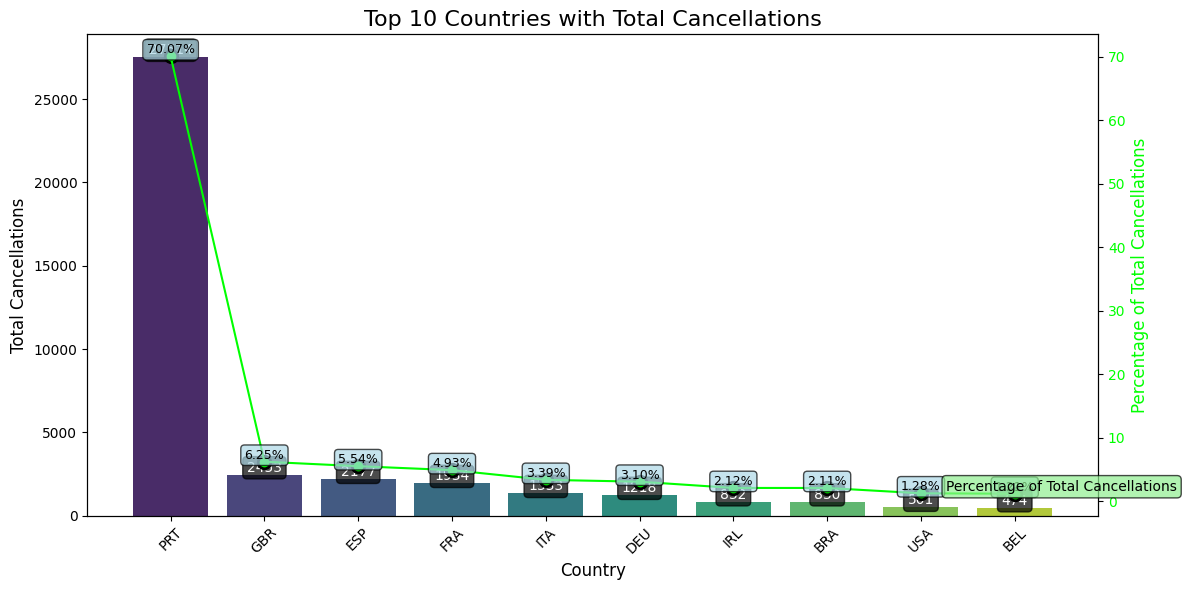

In [50]:
# CHATGPT RESPONSE

# i want a scatter plot for Top 10 countries with total number of  cancellations 

# instead of scatter plot
# give me bar chart for the same
# and line chart overlapping the bars chart showing percentage change between number of cancellations of one country to the next.
# give proper bar labels in dark box
# and line label in light green box 


#######################################################################################


import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by country and calculate the total number of cancellations
cancellations_by_country = df[df['is_canceled'] == 1].groupby('country').size().reset_index(name='total_cancellations')

# Select the top 10 countries with the highest number of cancellations
top_10_countries = cancellations_by_country.nlargest(10, 'total_cancellations')

# Calculate the total number of cancellations for each country
total_cancellations = top_10_countries['total_cancellations'].sum()

# Calculate the percentage of cancellations for each country
top_10_countries['percentage_cancellations'] = (top_10_countries['total_cancellations'] / total_cancellations) * 100

# Sort the top 10 countries by percentage cancellations
top_10_countries = top_10_countries.sort_values(by='percentage_cancellations', ascending=False)

# Create a bar chart for the total cancellations of the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='total_cancellations', data=top_10_countries, palette='viridis')

# Add labels to the bars with dark boxes
for index, row in top_10_countries.iterrows():
    plt.text(row['country'], row['total_cancellations'], str(row['total_cancellations']),
             ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7),
             color='white')

# Customize labels and title for the bar chart
plt.title('Top 10 Countries with Total Cancellations', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Cancellations', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Create a line chart for the percentage change of total cancellations
plt.twinx()
plt.plot(top_10_countries['country'], top_10_countries['percentage_cancellations'], color='lime', marker='o', linestyle='-')
plt.ylabel('Percentage of Total Cancellations', fontsize=12, color='lime')
plt.tick_params(axis='y', labelcolor='lime')

# Add data labels for line data points with light blue boxes
for index, row in top_10_countries.iterrows():
    plt.scatter(row['country'], row['percentage_cancellations'], s=100, color='black')
    plt.text(row['country'], row['percentage_cancellations'], f"{row['percentage_cancellations']:.2f}%",
             ha='center', va='bottom', fontsize=9,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7), color='black')

# Add label for the line chart with light green box
plt.text(9.5, top_10_countries['percentage_cancellations'].iloc[-1], 'Percentage of Total Cancellations', ha='center', va='bottom',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7), color='black')

# Show plot
plt.tight_layout()
plt.show()


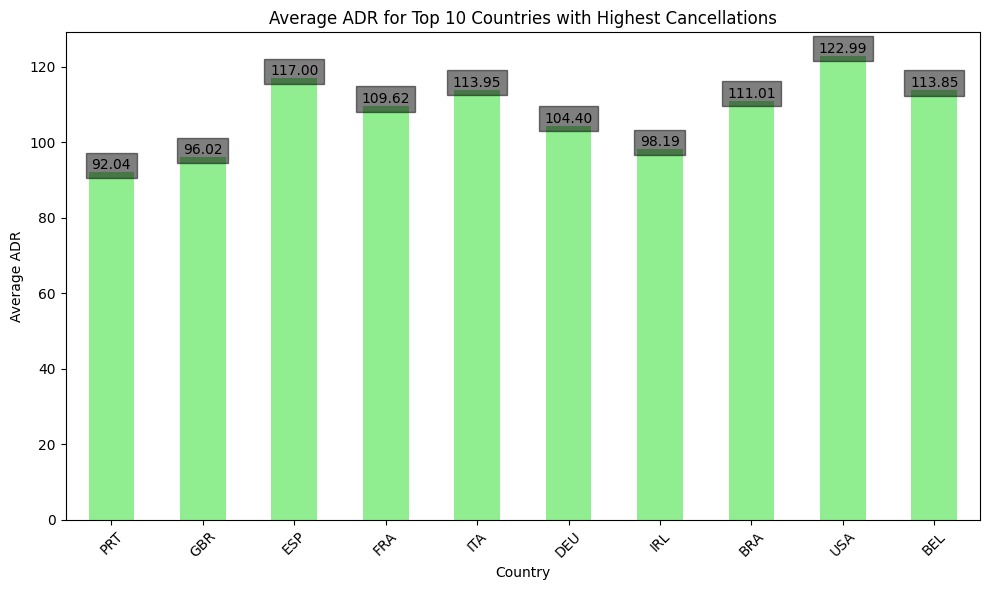

In [227]:
import matplotlib.pyplot as plt

# Group data by country and calculate average ADR
avg_adr_by_country = df.groupby('country')['adr'].mean()

# Filter only top 10 countries with highest cancellations
top_10_countries = cancellations_by_country.head(10)

# Get average ADR for top 10 countries
top_10_avg_adr = avg_adr_by_country[top_10_countries.index]

# Plotting
plt.figure(figsize=(10, 6))
top_10_avg_adr.plot(kind='bar', color='lightgreen')
plt.title('Average ADR for Top 10 Countries with Highest Cancellations')
plt.xlabel('Country')
plt.ylabel('Average ADR')

# Adding data labels with dark boxes
for i, value in enumerate(top_10_avg_adr):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', bbox=dict(facecolor='black', alpha=0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


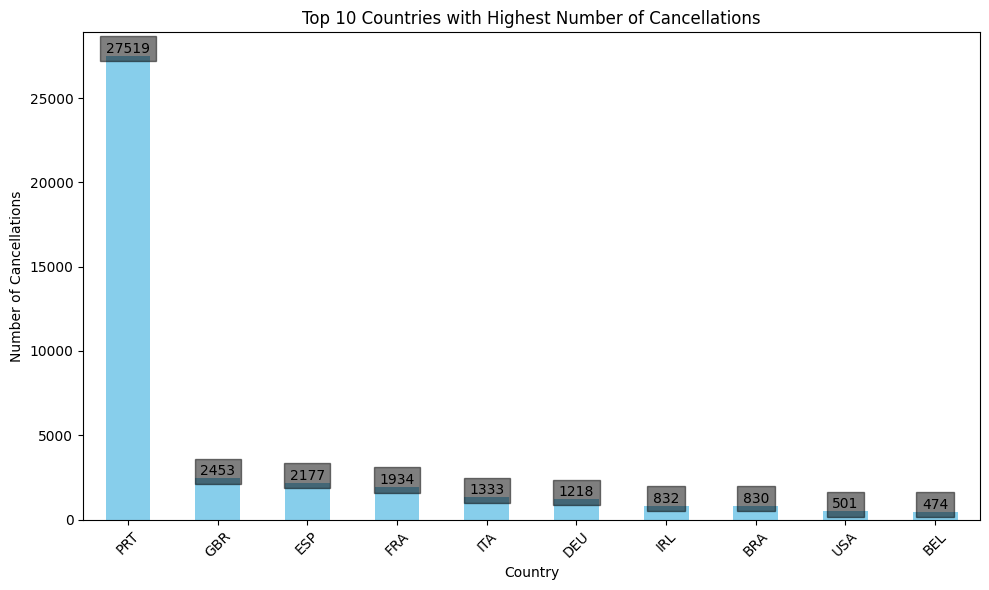

In [226]:
import matplotlib.pyplot as plt

# Group data by country and sum cancellations
cancellations_by_country = df[df['is_canceled'] == 1].groupby('country').size().sort_values(ascending=False)

# Get top 10 countries with highest cancellations
top_10_countries = cancellations_by_country.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Highest Number of Cancellations')
plt.xlabel('Country')
plt.ylabel('Number of Cancellations')

# Adding data labels with dark boxes
for i, value in enumerate(top_10_countries):
    plt.text(i, value, str(value), ha='center', va='bottom', bbox=dict(facecolor='black', alpha=0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


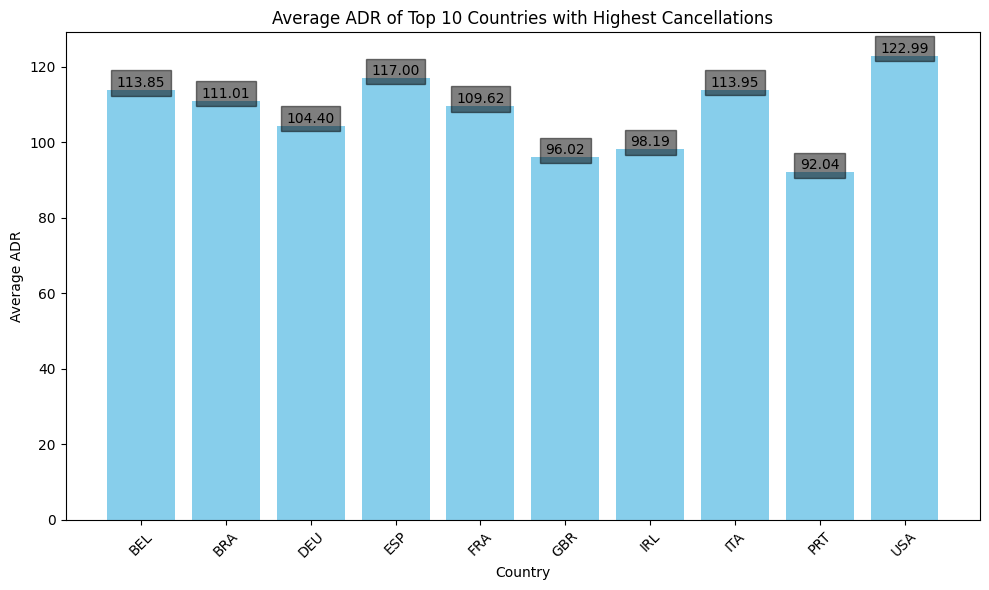

In [225]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('hotel_bookings.csv')

# Filter data for cancelled bookings
cancelled_bookings = df[df['is_canceled'] == 1]

# Group data by country and count cancellations
cancellation_counts = cancelled_bookings.groupby('country')['is_canceled'].count().reset_index()

# Sort countries by cancellation counts and get top 10
top_10_countries = cancellation_counts.sort_values(by='is_canceled', ascending=False).head(10)

# Merge with original dataframe to get ADR
top_10_countries_with_adr = top_10_countries.merge(df[['country', 'adr']], on='country', how='left')

# Group by country and calculate average ADR
average_adr_top_10 = top_10_countries_with_adr.groupby('country')['adr'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_adr_top_10['country'], average_adr_top_10['adr'], color='skyblue')

# Adding data labels
for i, value in enumerate(average_adr_top_10['adr']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', bbox=dict(facecolor='black', alpha=0.5))

plt.title('Average ADR of Top 10 Countries with Highest Cancellations')
plt.xlabel('Country')
plt.ylabel('Average ADR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


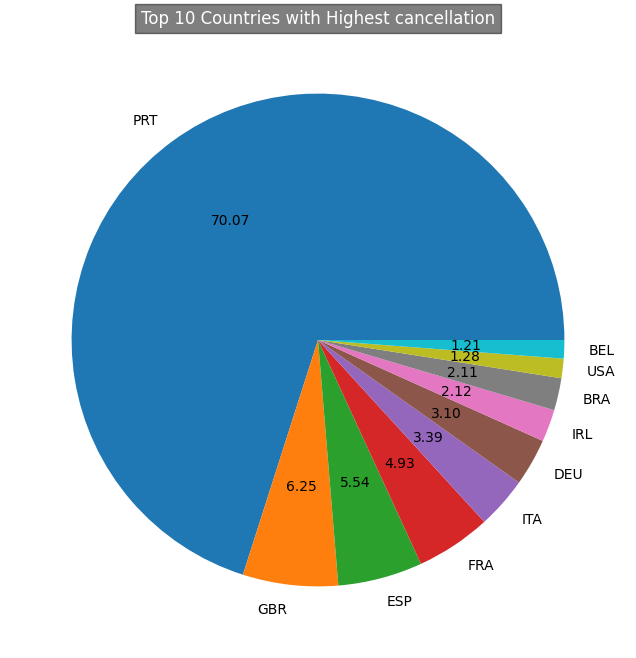

In [154]:
cancelled_data=df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10] # value_counts return descending order value - :10 will give top 10
plt.figure(figsize=(8,8))
plt.title("Top 10 Countries with Highest cancellation", color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.pie(top_10_country,autopct='%.2f', labels = top_10_country.index)
plt.show()

*******************************************************************************************************************************

CONCLUSION

1. Most cancellations are from Prtugal - ie. they should work on strategiesing schemes to decrease cancellations


*******************************************************************************************************************************

*******************************************************************************************************************************

WHAT TO DO NEXT

LETS CHECK WHEATHER THEY HAVE PRICE DIFFERENCE AS HIGH OR LOW 


*******************************************************************************************************************************

posx and posy should be finite values
posx and posy should be finite values


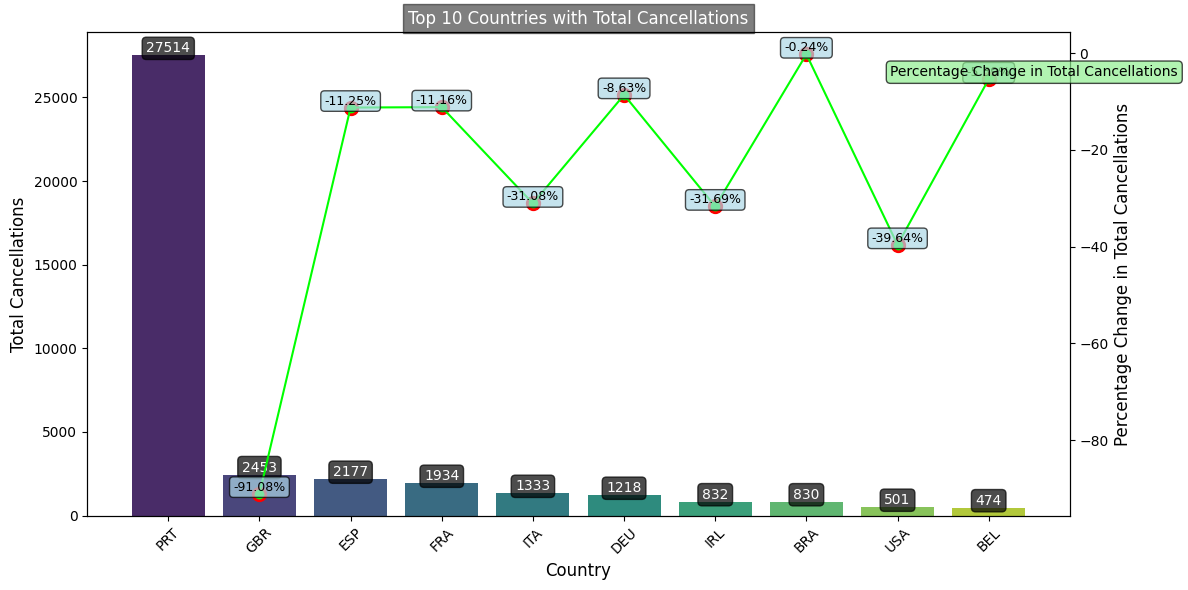

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by country and calculate the total number of cancellations
cancellations_by_country = df[df['is_canceled'] == 1].groupby('country').size().reset_index(name='total_cancellations')

# Select the top 10 countries with the highest number of cancellations
top_10_countries = cancellations_by_country.nlargest(10, 'total_cancellations')

# Calculate the total number of cancellations for each country
total_cancellations = top_10_countries['total_cancellations'].sum()

# Calculate the percentage of cancellations for each country
top_10_countries['percentage_cancellations'] = (top_10_countries['total_cancellations'] / total_cancellations) * 100

# Sort the top 10 countries by percentage cancellations
top_10_countries = top_10_countries.sort_values(by='total_cancellations', ascending=False)

# Calculate the percentage change in total cancellations
top_10_countries['percentage_change'] = top_10_countries['percentage_cancellations'].pct_change() * 100

# Create a bar chart for the total cancellations of the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='total_cancellations', data=top_10_countries, palette='viridis')

# Add labels to the bars with dark boxes
for index, row in top_10_countries.iterrows():
    plt.text(row['country'], row['total_cancellations'], str(row['total_cancellations']),
             ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7),
             color='white')

# Customize labels and title for the bar chart
plt.title('Top 10 Countries with Total Cancellations', color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Cancellations', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Create a line chart for the percentage change in total cancellations
plt.twinx()
plt.plot(top_10_countries['country'], top_10_countries['percentage_change'], color='lime', marker='o', linestyle='-')
plt.ylabel('Percentage Change in Total Cancellations', fontsize=12, color='Black')
plt.tick_params(axis='y')

# Add data labels for line data points with light blue boxes
for index, row in top_10_countries.iterrows():
    plt.scatter(row['country'], row['percentage_change'], s=100, color='Red')
    plt.text(row['country'], row['percentage_change'], f"{row['percentage_change']:.2f}%",
             ha='center', va='bottom', fontsize=9,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7), color='black')

# Add label for the line chart with light green box
plt.text(9.5, top_10_countries['percentage_change'].iloc[-1], 'Percentage Change in Total Cancellations', ha='center', va='bottom',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7), color='black')

# Show plot
plt.tight_layout()
plt.show()


In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by country and calculate the average ADR for each country
average_adr_by_country = df.groupby('country')['adr'].mean().reset_index(name='average_adr')

# Select the top 10 countries with the highest number of cancellations
top_10_countries = cancellations_by_country.nlargest(10, 'total_cancellations')

# Merge the top 10 countries with the average ADR data
top_10_countries = pd.merge(top_10_countries, average_adr_by_country, on='country', how='left')

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='average_adr', data=top_10_countries, palette='viridis')

# Add labels to the bars with dark boxes
for index, row in top_10_countries.iterrows():
    plt.text(row['country'], row['average_adr'], f"${row['average_adr']:.2f}",
             ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7),
             color='white')

# Customize labels and title for the bar chart
plt.title('Top 10 Countries with Highest Average ADR', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average ADR', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


ConversionError: Failed to convert value(s) to axis units: 'PRT'

Error in callback <function _draw_all_if_interactive at 0x0000028E1489BC70> (for post_execute):


ConversionError: Failed to convert value(s) to axis units: 'PRT'

ConversionError: Failed to convert value(s) to axis units: 'PRT'

<Figure size 1200x600 with 1 Axes>

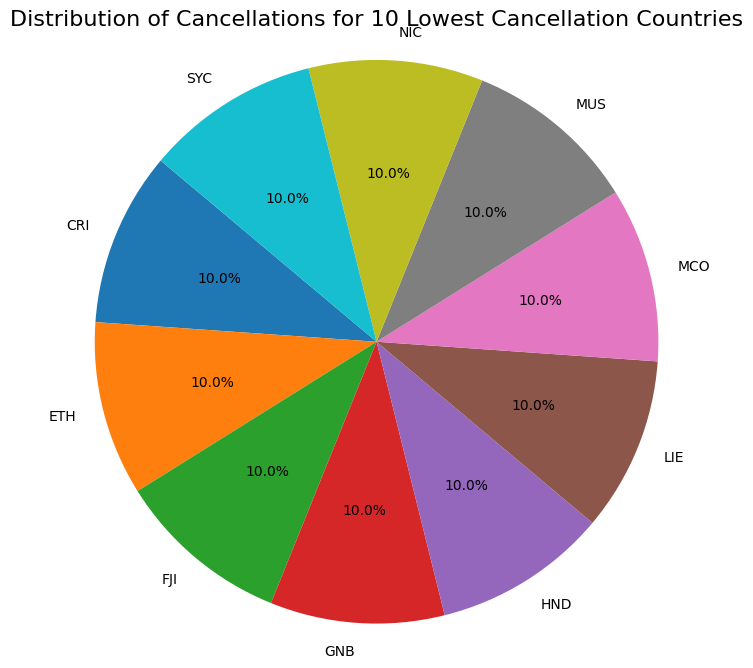

In [53]:
import matplotlib.pyplot as plt

# Group the data by country and calculate the total number of cancellations
cancellations_by_country = df[df['is_canceled'] == 1].groupby('country').size().reset_index(name='total_cancellations')

# Select the 10 countries with the lowest number of cancellations
lowest_10_countries = cancellations_by_country.nsmallest(10, 'total_cancellations')

# Create a pie chart for the lowest 10 countries with cancellations
plt.figure(figsize=(8, 8))
plt.pie(lowest_10_countries['total_cancellations'], labels=lowest_10_countries['country'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cancellations for 10 Lowest Cancellation Countries', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()


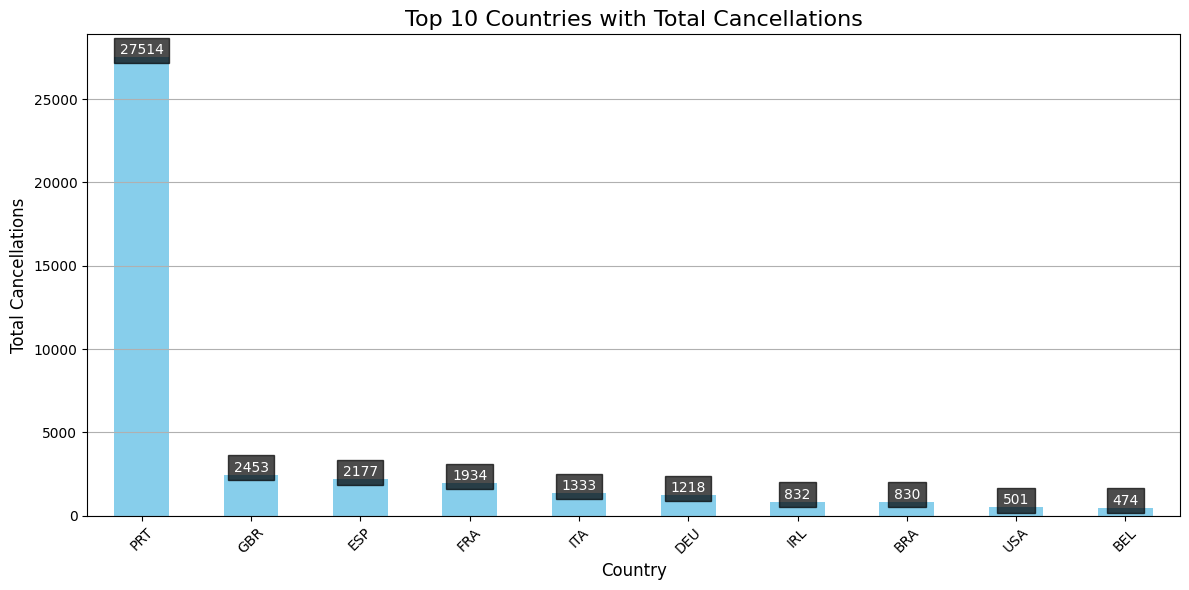

In [56]:
import matplotlib.pyplot as plt

# Group by country and calculate total cancellations
country_cancellations = df[df['is_canceled'] == 1].groupby('country').size().sort_values(ascending=False)

# Select top 10 countries
top_10_countries = country_cancellations.head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
ax = top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Total Cancellations', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Cancellations', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Show gridlines only on the y-axis

# Add data labels in dark boxes
for i, value in enumerate(top_10_countries):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10, color='white', bbox=dict(facecolor='black', alpha=0.7))

plt.tight_layout()
plt.show()


In [57]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [58]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

*******************************************************************************************************************************

CONCLUSION

1. Our hypothesis stays wrong - that most of the booking are from offline
2. ONLINE BOOKINGS ARE 2WICE A MORE

*******************************************************************************************************************************

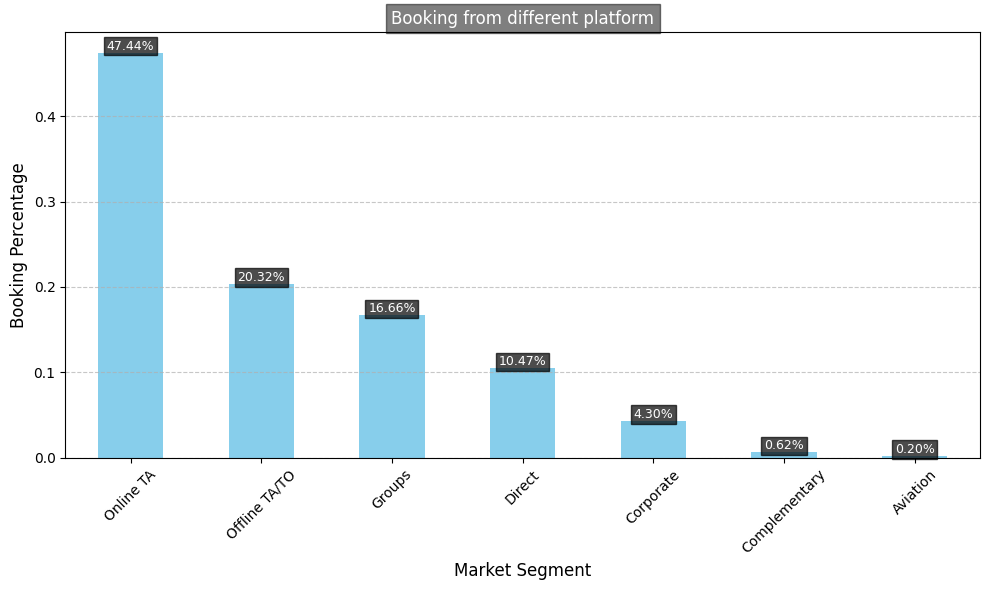

In [162]:
import matplotlib.pyplot as plt

# Calculate normalized value counts for 'market_segment'
market_segment_counts = df['market_segment'].value_counts(normalize=True)

# Plot bar chart
plt.figure(figsize=(10, 6))
market_segment_counts.plot(kind='bar', color='skyblue')
plt.title('Booking from different platform', color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Booking Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels in percentage with dark boxes
for i, value in enumerate(market_segment_counts):
    plt.text(i, value, f'{value:.2%}', ha='center', va='bottom', fontsize=9, color='white', bbox=dict(facecolor='black', alpha=0.7, pad=2))

plt.tight_layout()
plt.show()


In [60]:
cancelled_data['market_segment'].value_counts()

Online TA        20738
Groups           12097
Offline TA/TO     8277
Direct            1920
Corporate          978
Complementary       90
Aviation            52
Name: market_segment, dtype: int64

In [61]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

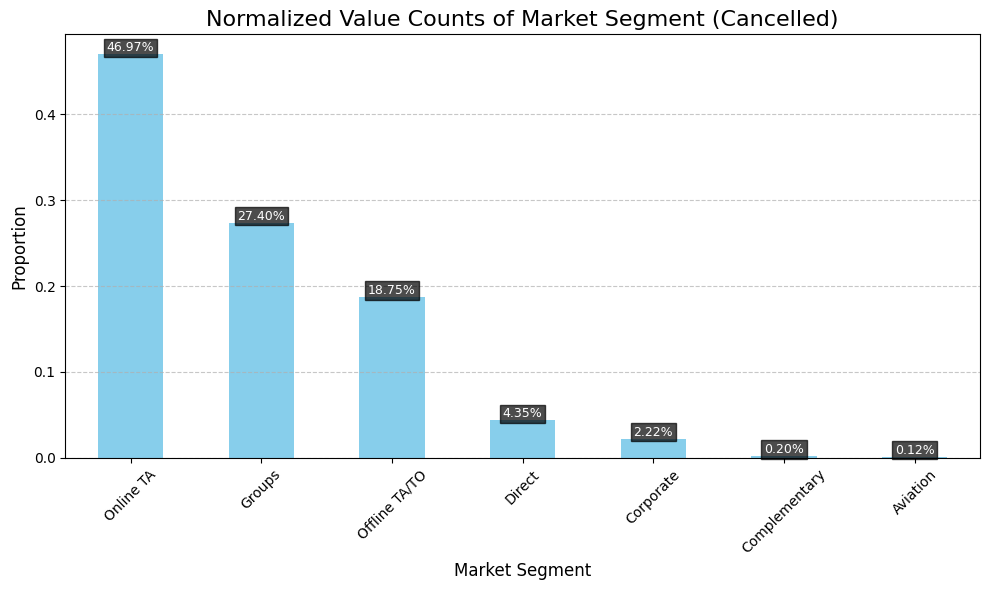

In [62]:
import matplotlib.pyplot as plt

# Calculate normalized value counts for 'market_segment' in cancelled_data
cancelled_market_segment_counts = cancelled_data['market_segment'].value_counts(normalize=True)

# Plot bar chart
plt.figure(figsize=(10, 6))
cancelled_market_segment_counts.plot(kind='bar', color='skyblue')
plt.title('Normalized Value Counts of Market Segment (Cancelled)', fontsize=16)
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels in percentage with dark boxes
for i, value in enumerate(cancelled_market_segment_counts):
    plt.text(i, value, f'{value:.2%}', ha='center', va='bottom', fontsize=9, color='white', bbox=dict(facecolor='black', alpha=0.7, pad=2))

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

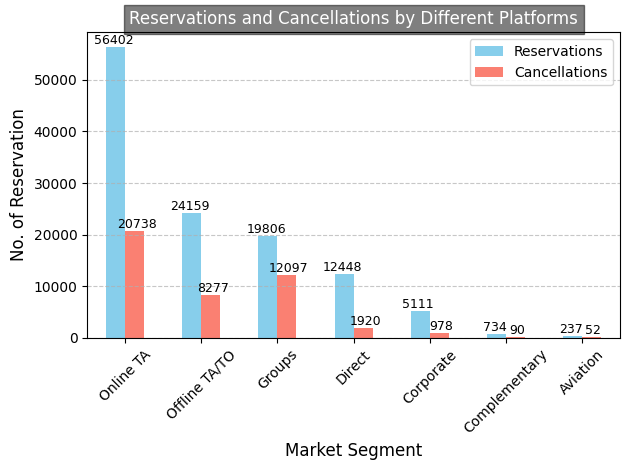

In [170]:
import matplotlib.pyplot as plt

# Calculate total reservations by market segment
reservations_counts = df['market_segment'].value_counts()

# Calculate total cancellations by market segment
cancelled_market_segment_counts = cancelled_data['market_segment'].value_counts()

# Create a DataFrame combining reservations and cancellations
combined_data = pd.concat([reservations_counts, cancelled_market_segment_counts], axis=1, keys=['Reservations', 'Cancellations'])

# Plot clustered column chart
plt.figure(figsize=(12, 6))
combined_data.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Reservations and Cancellations by Different Platforms', color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('No. of Reservation', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels for reservations and cancellations
for i, (reservations, cancellations) in enumerate(zip(combined_data['Reservations'], combined_data['Cancellations'])):
    plt.text(i - 0.15, reservations, str(reservations), ha='center', va='bottom', fontsize=9, color='black')
    plt.text(i + 0.15, cancellations, str(cancellations), ha='center', va='bottom', fontsize=9, color='black')

plt.legend(['Reservations', 'Cancellations'], loc='upper right')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

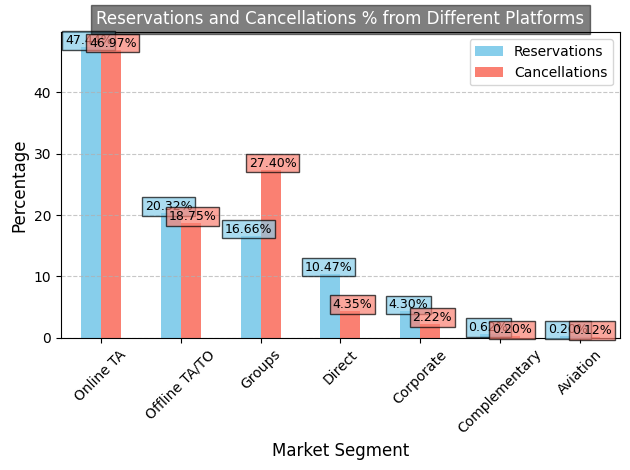

In [179]:
import matplotlib.pyplot as plt

# Calculate total reservations by market segment
total_reservations = df['market_segment'].count()

# Calculate total cancellations by market segment
total_cancellations = cancelled_data['market_segment'].count()

# Calculate percentages of reservations and cancellations relative to their respective totals
reservations_percentages = (df['market_segment'].value_counts() / total_reservations) * 100
cancellations_percentages = (cancelled_data['market_segment'].value_counts() / total_cancellations) * 100

# Create a DataFrame combining percentages of reservations and cancellations
combined_percentages = pd.concat([reservations_percentages, cancellations_percentages], axis=1, keys=['Reservations (%)', 'Cancellations (%)'])

# Plot clustered column chart
plt.figure(figsize=(12, 6))
combined_percentages.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Reservations and Cancellations % from Different Platforms', color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels for reservations and cancellations percentages
for i, (reservations_percent, cancellations_percent) in enumerate(zip(combined_percentages['Reservations (%)'], combined_percentages['Cancellations (%)'])):
    plt.text(i - 0.15, reservations_percent, f'{reservations_percent:.2f}%', ha='center', va='bottom', fontsize=9, color='black', bbox=dict(facecolor='skyblue', alpha=0.7, pad=2))
    plt.text(i + 0.15, cancellations_percent, f'{cancellations_percent:.2f}%', ha='center', va='bottom', fontsize=9, color='black', bbox=dict(facecolor='salmon', alpha=0.7, pad=2))

plt.legend(['Reservations', 'Cancellations'], loc='upper right')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

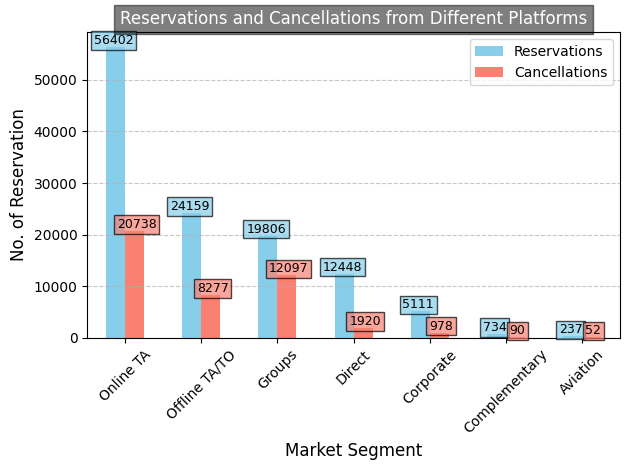

In [178]:
import matplotlib.pyplot as plt

# Calculate total reservations by market segment
reservations_counts = df['market_segment'].value_counts()

# Calculate total cancellations by market segment
cancelled_market_segment_counts = cancelled_data['market_segment'].value_counts()

# Create a DataFrame combining reservations and cancellations
combined_data = pd.concat([reservations_counts, cancelled_market_segment_counts], axis=1, keys=['Reservations', 'Cancellations'])

# Plot clustered column chart
plt.figure(figsize=(12, 6))
combined_data.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Reservations and Cancellations from Different Platforms', color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('No. of Reservation', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels for reservations and cancellations
for i, (reservations, cancellations) in enumerate(zip(combined_data['Reservations'], combined_data['Cancellations'])):
    plt.text(i - 0.15, reservations, str(reservations), ha='center', va='bottom', fontsize=9, color='black', bbox=dict(facecolor='skyblue', alpha=0.7, pad=2))
    plt.text(i + 0.15, cancellations, str(cancellations), ha='center', va='bottom', fontsize=9, color='black', bbox=dict(facecolor='salmon', alpha=0.7, pad=2))

plt.legend(['Reservations', 'Cancellations'], loc='upper right')
plt.tight_layout()
plt.show()


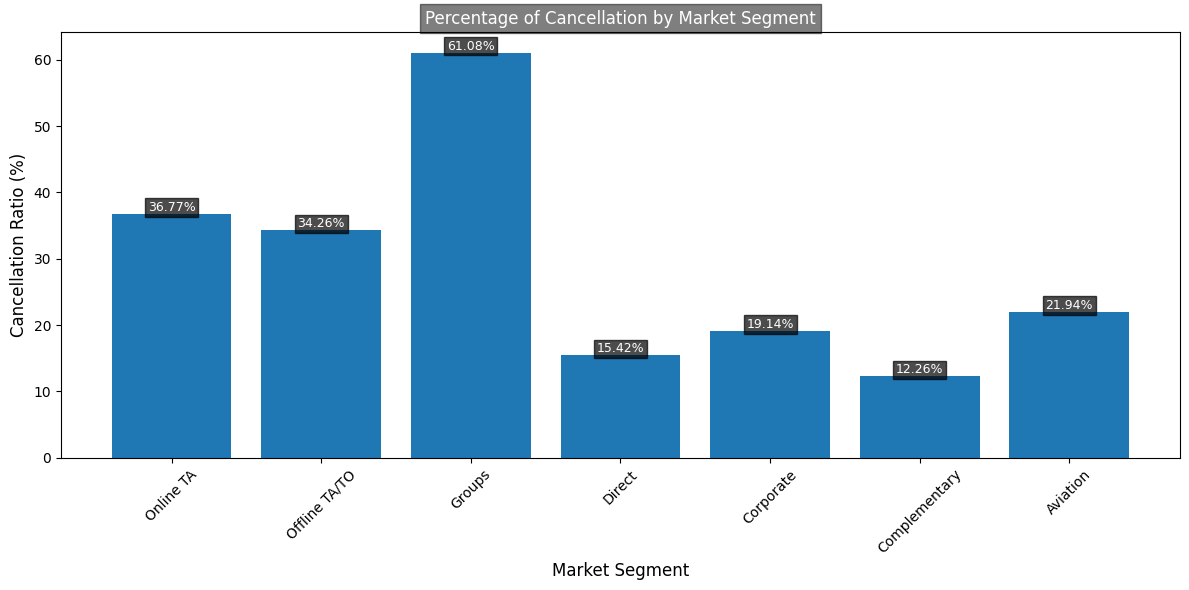

In [233]:
import matplotlib.pyplot as plt

# Calculate the percentage of cancellation divided by respective reservation
combined_data['Cancellation_Ratio'] = combined_data['Cancellations'] / combined_data['Reservations'] * 100

# Plot clustered column chart for cancellation ratio
plt.figure(figsize=(12, 6))
plt.bar(combined_data.index, combined_data['Cancellation_Ratio'])
plt.title('Percentage of Cancellation by Market Segment', color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Cancellation Ratio (%)', fontsize=12)
plt.xticks(rotation=45)

# Add data labels for cancellation ratio
for i, ratio in enumerate(combined_data['Cancellation_Ratio']):
    plt.text(i, ratio, f'{ratio:.2f}%', ha='center', va='bottom', fontsize=9, color='white', bbox=dict(facecolor='black', alpha=0.7, pad=2))

plt.tight_layout()
plt.show()


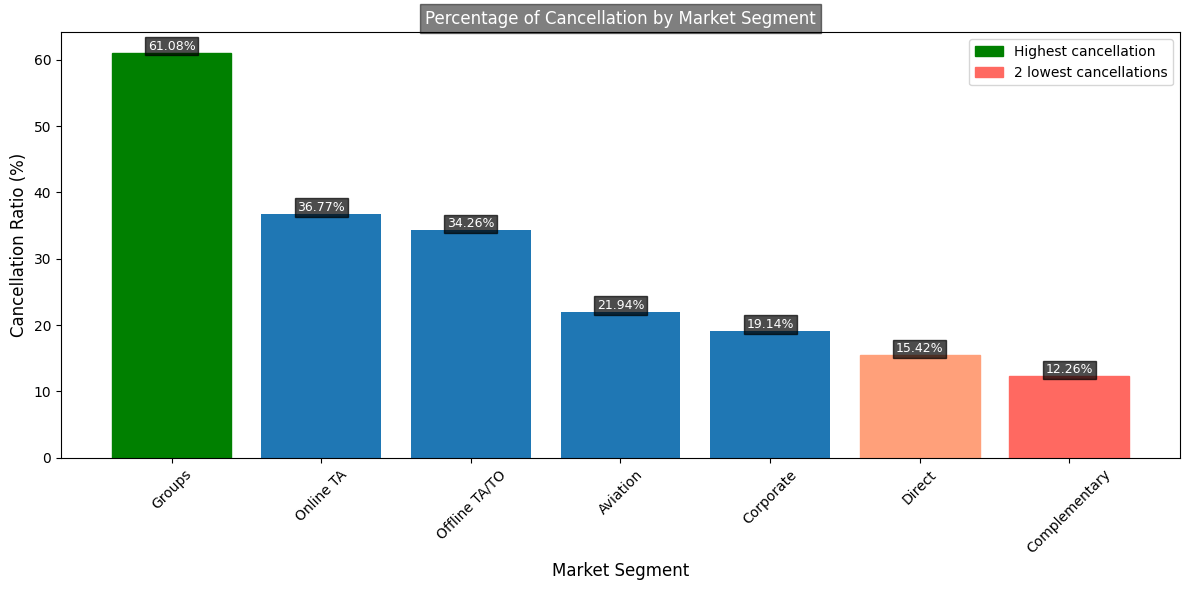

In [232]:
import matplotlib.pyplot as plt

# Calculate the percentage of cancellation divided by respective reservation
combined_data['Cancellation_Ratio'] = combined_data['Cancellations'] / combined_data['Reservations'] * 100

# Sort the data by cancellation ratio to identify highest and lowest values
sorted_data = combined_data.sort_values(by='Cancellation_Ratio', ascending=False)

# Plot clustered column chart for cancellation ratio
plt.figure(figsize=(12, 6))

# Plot bars with different colors
bars = plt.bar(sorted_data.index, sorted_data['Cancellation_Ratio'])

# Set color for the highest percentage bar
bars[0].set_color('green')

# Set colors for the two lowest percentage bars
bars[-1].set_color('#FF6961')  # Red shade
bars[-2].set_color('#FFA07A')  # Red shade

# Legend
legend_handles = [plt.Rectangle((0,0),1,1, color='green'), plt.Rectangle((0,0),1,1, color='#FF6961'), plt.Rectangle((0,0),1,1, color='#FFA07A')]
plt.legend(legend_handles, ['Highest cancellation', '2 lowest cancellations'], loc='upper right')

# Plot settings
plt.title('Percentage of Cancellation by Market Segment', color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Cancellation Ratio (%)', fontsize=12)
plt.xticks(rotation=45)

# Add data labels for cancellation ratio
for i, ratio in enumerate(sorted_data['Cancellation_Ratio']):
    plt.text(i, ratio, f'{ratio:.2f}%', ha='center', va='bottom', fontsize=9, color='white', bbox=dict(facecolor='black', alpha=0.7, pad=2))

plt.tight_layout()
plt.show()


*******************************************************************************************************************************

CONCLUSION

1. CANCELLATION IS ALSO HIGH ON ONLINE BOOKIN
2. Proportion of cancellation to reservation is least in Direct and most on Online and Groups

*******************************************************************************************************************************

posx and posy should be finite values
posx and posy should be finite values


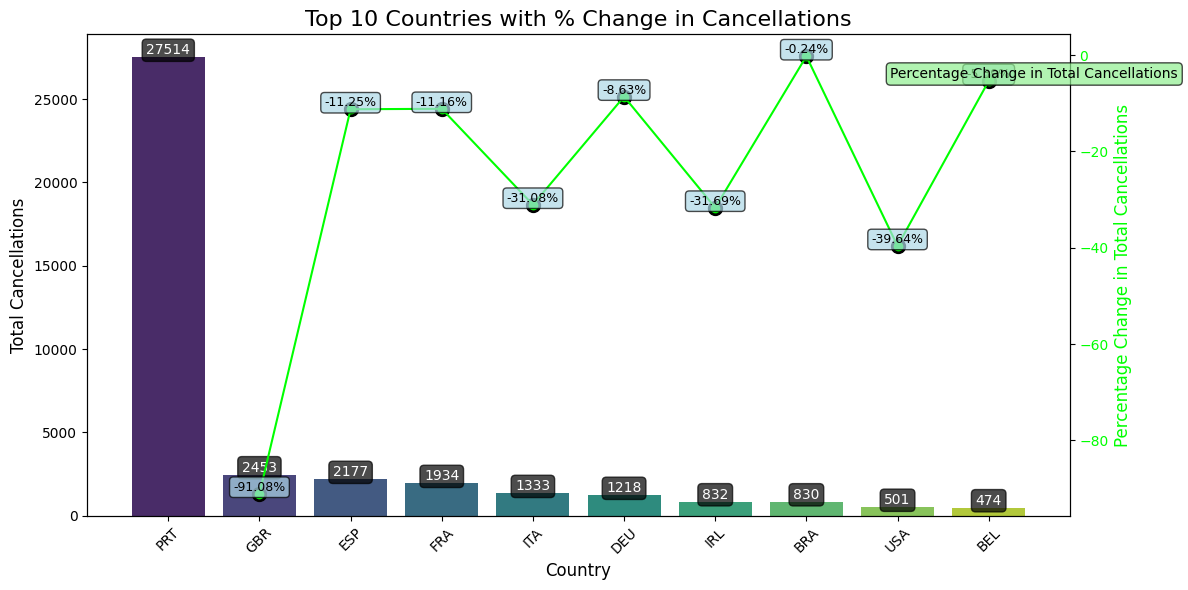

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by country and calculate the total number of cancellations
cancellations_by_country = df[df['is_canceled'] == 1].groupby('country').size().reset_index(name='total_cancellations')

# Select the top 10 countries with the highest number of cancellations
top_10_countries = cancellations_by_country.nlargest(10, 'total_cancellations')

# Calculate the total number of cancellations for each country
total_cancellations = top_10_countries['total_cancellations'].sum()

# Calculate the percentage of cancellations for each country
top_10_countries['percentage_cancellations'] = (top_10_countries['total_cancellations'] / total_cancellations) * 100

# Sort the top 10 countries by percentage cancellations
top_10_countries = top_10_countries.sort_values(by='total_cancellations', ascending=False)

# Calculate the percentage change in total cancellations
top_10_countries['percentage_change'] = top_10_countries['percentage_cancellations'].pct_change() * 100

# Create a bar chart for the total cancellations of the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='total_cancellations', data=top_10_countries, palette='viridis')

# Add labels to the bars with dark boxes
for index, row in top_10_countries.iterrows():
    plt.text(row['country'], row['total_cancellations'], str(row['total_cancellations']),
             ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7),
             color='white')

# Customize labels and title for the bar chart
plt.title('Top 10 Countries with % Change in Cancellations', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Cancellations', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Create a line chart for the percentage change in total cancellations
plt.twinx()
plt.plot(top_10_countries['country'], top_10_countries['percentage_change'], color='lime', marker='o', linestyle='-')
plt.ylabel('Percentage Change in Total Cancellations', fontsize=12, color='lime')
plt.tick_params(axis='y', labelcolor='lime')

# Add data labels for line data points with light blue boxes
for index, row in top_10_countries.iterrows():
    plt.scatter(row['country'], row['percentage_change'], s=100, color='black')
    plt.text(row['country'], row['percentage_change'], f"{row['percentage_change']:.2f}%",
             ha='center', va='bottom', fontsize=9,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7), color='black')

# Add label for the line chart with light green box
plt.text(9.5, top_10_countries['percentage_change'].iloc[-1], 'Percentage Change in Total Cancellations', ha='center', va='bottom',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7), color='black')

# Show plot
plt.tight_layout()
plt.show()


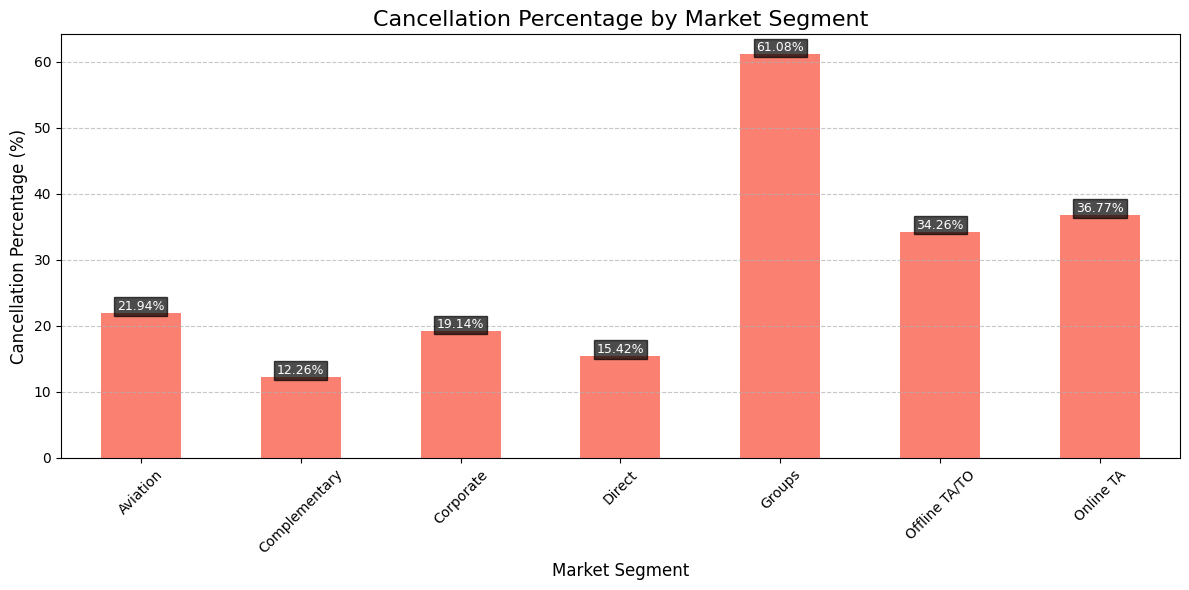

In [65]:
import matplotlib.pyplot as plt

# Calculate total bookings by market segment
total_bookings = df['market_segment'].value_counts()

# Calculate total cancellations by market segment
total_cancellations = cancelled_data['market_segment'].value_counts()

# Calculate cancellation percentage relative to total bookings for each market segment
cancellation_percentage = (total_cancellations / total_bookings) * 100

# Plot bar chart
plt.figure(figsize=(12, 6))
cancellation_percentage.plot(kind='bar', color='salmon')
plt.title('Cancellation Percentage by Market Segment', fontsize=16)
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Cancellation Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels in dark boxes
for i, value in enumerate(cancellation_percentage):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=9, color='white', bbox=dict(facecolor='black', alpha=0.7, pad=2))

plt.tight_layout()
plt.show()


*******************************************************************************************************************************

CONCLUSION

THIS GIVES CANCELATION TO BOOKING PERCENTQAGE - LESS THE PERCENTAGE - LESS CANCELLATION


1. LEAST CANCELLATION 

   A. COMPLEMENTARY TICKETS - People rarely cancels complemetary tickets
   B. DIRECT TICKETS - PEOPLE WHO BUY TICKETS DRIECTLY FROM HOTEL - LESS CANCELLATION
   

*******************************************************************************************************************************

TypeError: 'method' object is not subscriptable

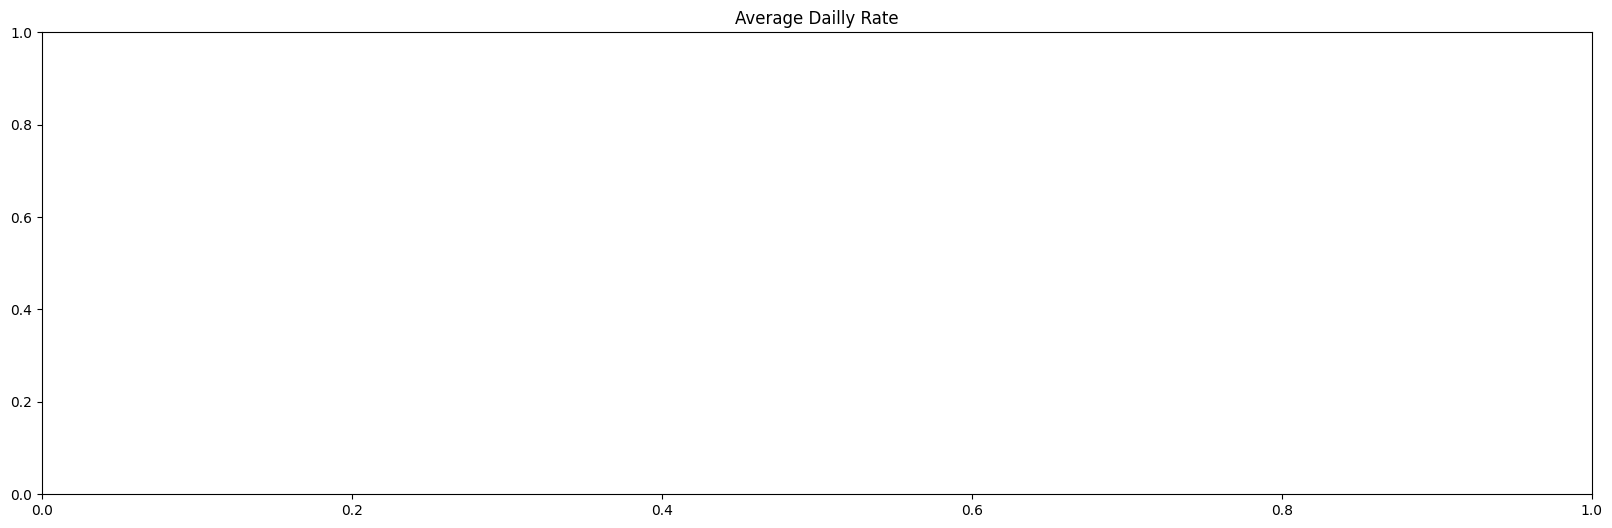

In [66]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date',inplace = True)

not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date',inplace = True)

plt.figure(figsize=(20,6))
plt.title('Average Dailly Rate')
plt.plot(not_cancelled_df_adr.groupby['reservation_status_date'],not_cancelled_df_adr['adr'],label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label = 'cancelled')
plt.legend()


*******************************************************************************************************************************

ISSUE - 

Yes, there seems to be a small issue in the code. The problem lies in the plt.plot() function where you are trying to call groupby on the DataFrame. Instead, you should directly access the columns for the x and y values. Here's the corrected version of your code:

##### CODE

In this corrected code, I directly access the 'reservation_status_date' and 'adr' columns for both cancelled and not cancelled data. This should resolve the issue, and your plot should display the Average Daily Rate trends for both cancelled and not cancelled bookings correctly.

*******************************************************************************************************************************

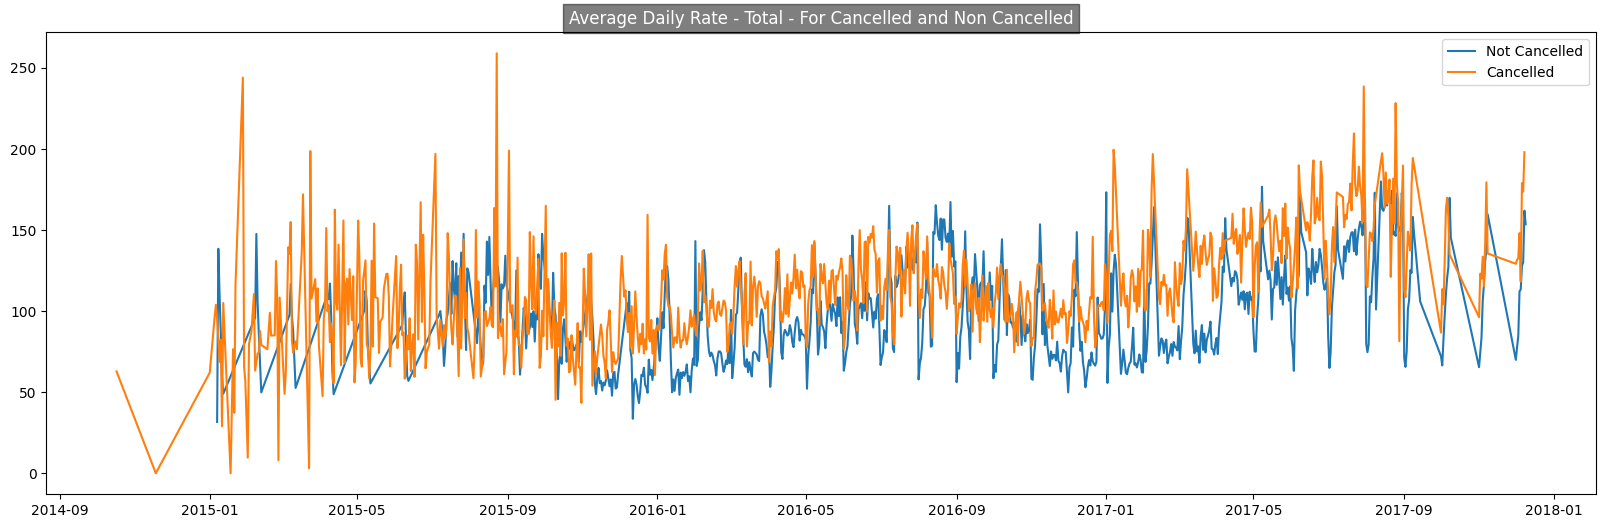

In [180]:
#CODE


import matplotlib.pyplot as plt

# Grouping and calculating mean ADR for cancelled data
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')['adr'].mean().reset_index()

# Sorting by reservation_status_date
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

# Grouping and calculating mean ADR for not cancelled data
not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')['adr'].mean().reset_index()

# Sorting by reservation_status_date
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

# Plotting the ADR trend
plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate - Total - For Cancelled and Non Cancelled', color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='Cancelled')
plt.legend()
plt.show()


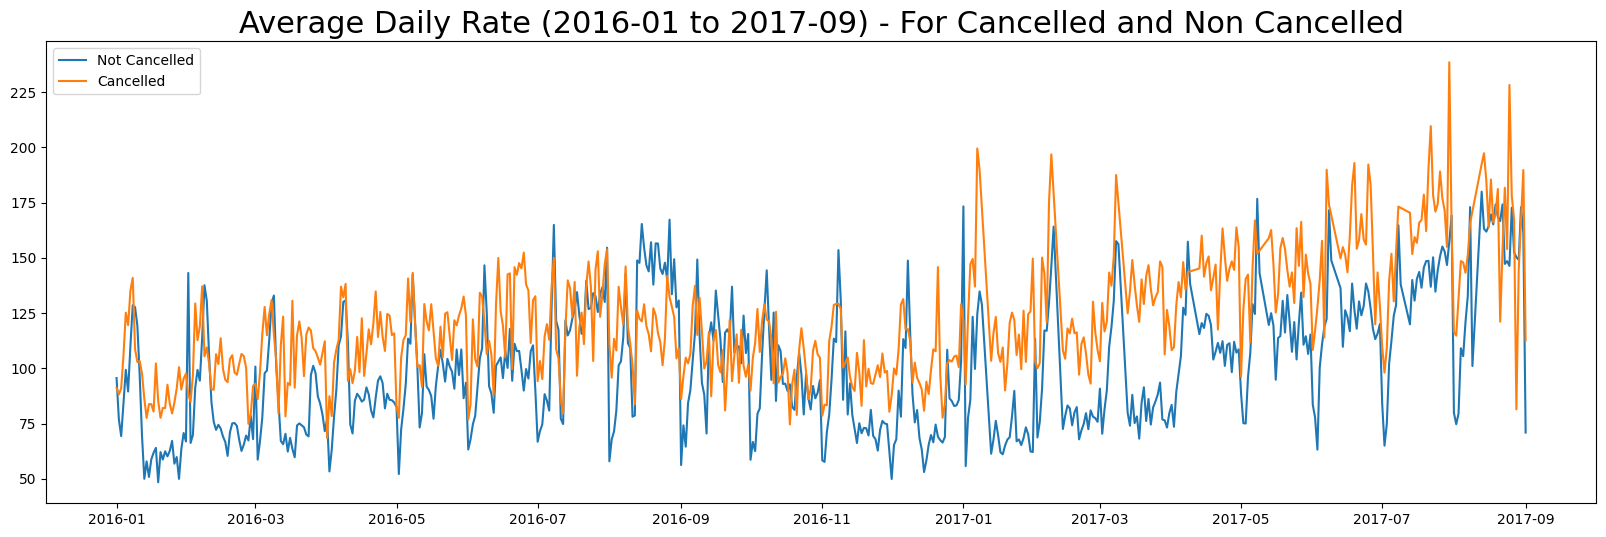

In [68]:
import matplotlib.pyplot as plt

# Filter cancelled data for the date range
cancelled_df_adr_filtered = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] >= '2016-01') & (cancelled_df_adr['reservation_status_date'] <= '2017-09')]

# Filter not cancelled data for the date range
not_cancelled_df_adr_filtered = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date'] >= '2016-01') & (not_cancelled_df_adr['reservation_status_date'] <= '2017-09')]

# Plotting the ADR trend within the specified date range
plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate (2016-01 to 2017-09) - For Cancelled and Non Cancelled', fontsize=22)
plt.plot(not_cancelled_df_adr_filtered['reservation_status_date'], not_cancelled_df_adr_filtered['adr'], label='Not Cancelled')
plt.plot(cancelled_df_adr_filtered['reservation_status_date'], cancelled_df_adr_filtered['adr'], label='Cancelled')
plt.legend()
plt.show()


*******************************************************************************************************************************

CONCLUSION

1. IT SHOWS THAT IN GENERAL PRICES OF CANCELLED BOOKINGS WERE GENERALLY HIGHER THAN NON CANCELLATION BOOKINGS - CANELLATION IS DUE TO HIGHER AVERAGE DAILY RATE.

*******************************************************************************************************************************

NameError: name 'cancelled_monthly_adr' is not defined

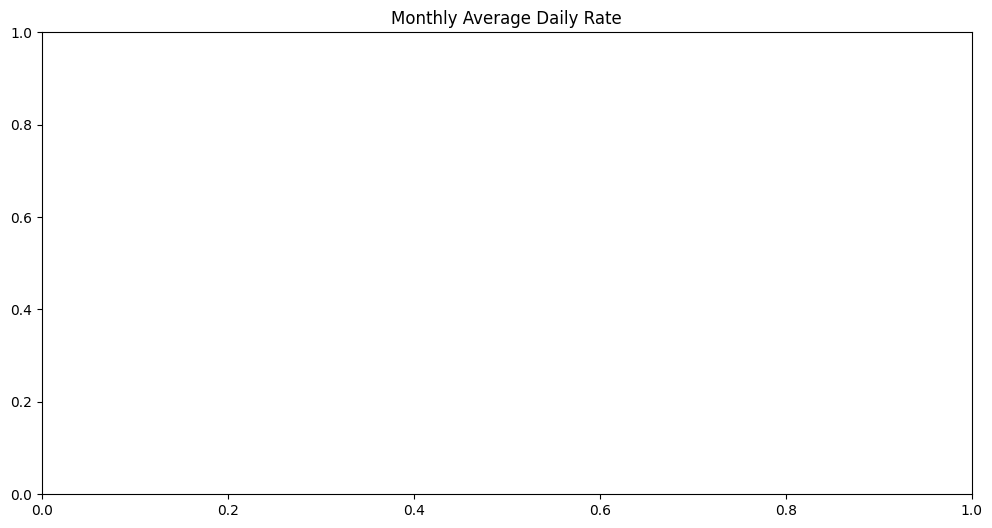

In [69]:
import matplotlib.pyplot as plt

# Plotting the monthly average ADR trend with specified colors
plt.figure(figsize=(12, 6))
plt.title('Monthly Average Daily Rate')
plt.plot(cancelled_monthly_adr.index, cancelled_monthly_adr.values, color='orange', label='Cancelled')
plt.plot(not_cancelled_monthly_adr.index, not_cancelled_monthly_adr.values, color='blue', label='Not Cancelled')
plt.xlabel('Date')
plt.ylabel('Average Daily Rate')
plt.legend()
plt.grid(True)
plt.show()


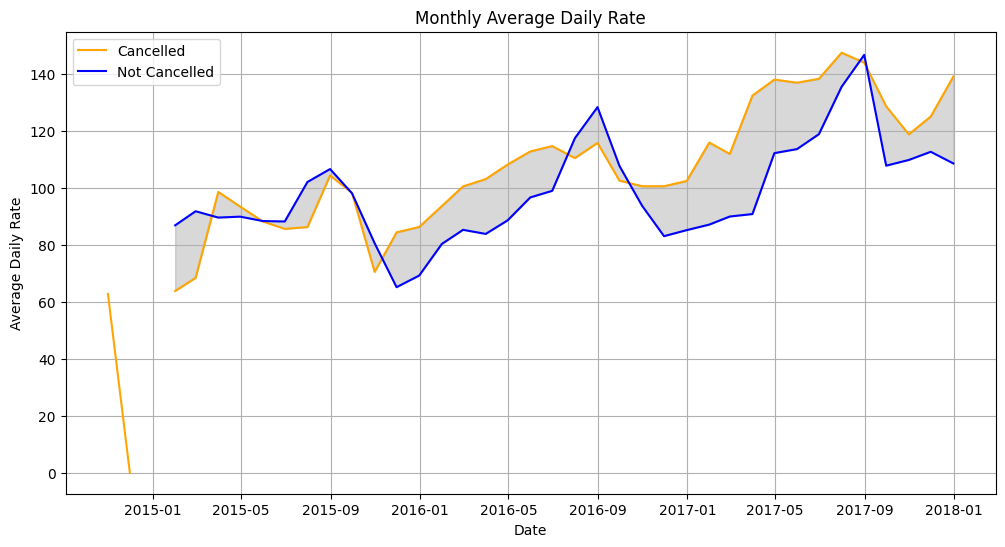

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'reservation_status_date' to datetime
cancelled_data['reservation_status_date'] = pd.to_datetime(cancelled_data['reservation_status_date'])
not_cancelled_data['reservation_status_date'] = pd.to_datetime(not_cancelled_data['reservation_status_date'])

# Resample and calculate monthly average ADR for cancelled bookings
cancelled_monthly_adr = cancelled_data.resample('M', on='reservation_status_date')['adr'].mean()

# Resample and calculate monthly average ADR for not cancelled bookings
not_cancelled_monthly_adr = not_cancelled_data.resample('M', on='reservation_status_date')['adr'].mean()

# Align indices
cancelled_monthly_adr, not_cancelled_monthly_adr = cancelled_monthly_adr.align(not_cancelled_monthly_adr, join='outer')

# Plotting the monthly average ADR trend with shaded area between the lines
plt.figure(figsize=(12, 6))
plt.title('Monthly Average Daily Rate')
plt.plot(cancelled_monthly_adr.index, cancelled_monthly_adr.values, color='orange', label='Cancelled')
plt.plot(not_cancelled_monthly_adr.index, not_cancelled_monthly_adr.values, color='blue', label='Not Cancelled')
plt.fill_between(cancelled_monthly_adr.index, cancelled_monthly_adr.values, not_cancelled_monthly_adr.values, color='grey', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Average Daily Rate')
plt.legend()
plt.grid(True)
plt.show()


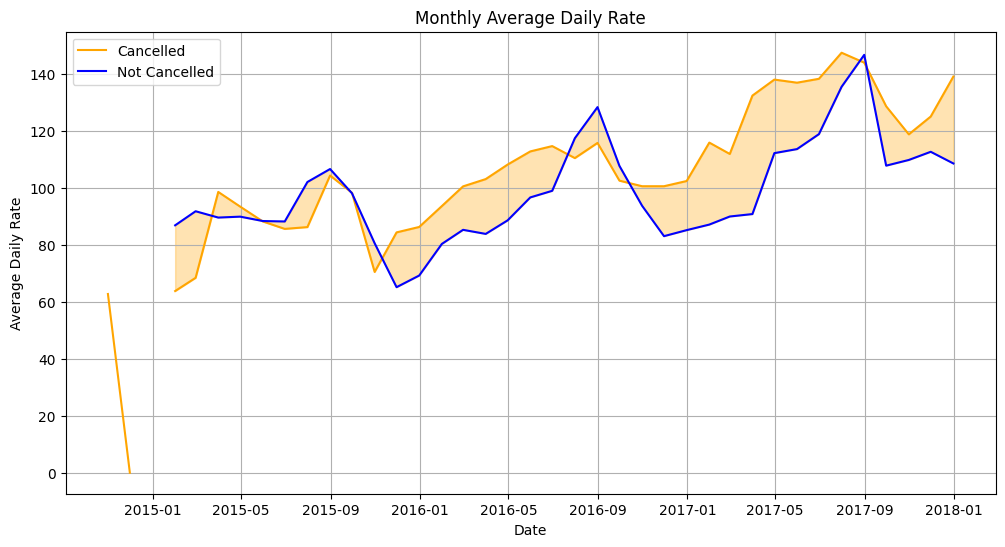

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'reservation_status_date' to datetime
cancelled_data['reservation_status_date'] = pd.to_datetime(cancelled_data['reservation_status_date'])
not_cancelled_data['reservation_status_date'] = pd.to_datetime(not_cancelled_data['reservation_status_date'])

# Resample and calculate monthly average ADR for cancelled bookings
cancelled_monthly_adr = cancelled_data.resample('M', on='reservation_status_date')['adr'].mean()

# Resample and calculate monthly average ADR for not cancelled bookings
not_cancelled_monthly_adr = not_cancelled_data.resample('M', on='reservation_status_date')['adr'].mean()

# Align indices
cancelled_monthly_adr, not_cancelled_monthly_adr = cancelled_monthly_adr.align(not_cancelled_monthly_adr, join='outer')

# Plotting the monthly average ADR trend with shaded area between the lines
plt.figure(figsize=(12, 6))
plt.title('Monthly Average Daily Rate')
plt.plot(cancelled_monthly_adr.index, cancelled_monthly_adr.values, color='orange', label='Cancelled')
plt.plot(not_cancelled_monthly_adr.index, not_cancelled_monthly_adr.values, color='blue', label='Not Cancelled')
plt.fill_between(cancelled_monthly_adr.index, cancelled_monthly_adr.values, not_cancelled_monthly_adr.values, color=['orange'], alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Average Daily Rate')
plt.legend()
plt.grid(True)
plt.show()


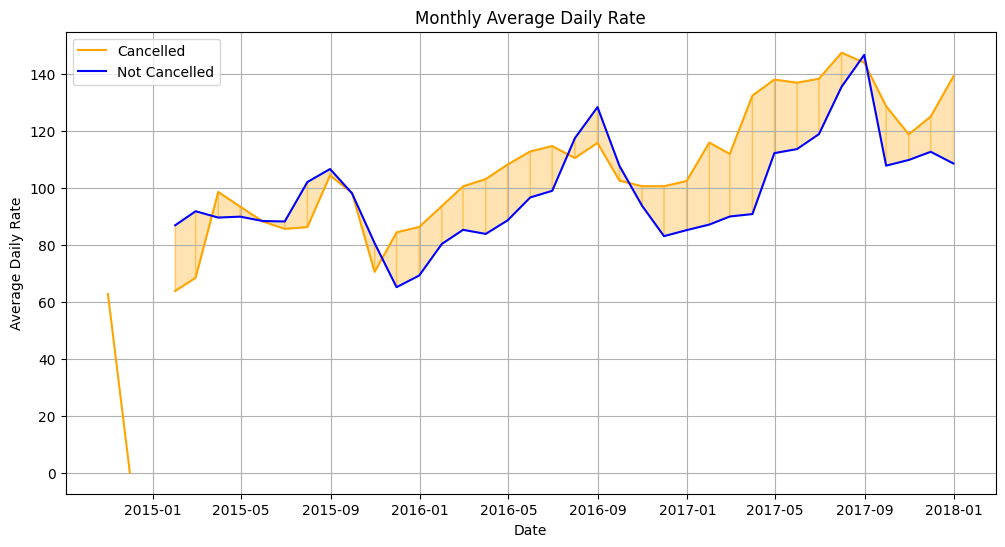

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'reservation_status_date' to datetime
cancelled_data['reservation_status_date'] = pd.to_datetime(cancelled_data['reservation_status_date'])
not_cancelled_data['reservation_status_date'] = pd.to_datetime(not_cancelled_data['reservation_status_date'])

# Resample and calculate monthly average ADR for cancelled bookings
cancelled_monthly_adr = cancelled_data.resample('M', on='reservation_status_date')['adr'].mean()

# Resample and calculate monthly average ADR for not cancelled bookings
not_cancelled_monthly_adr = not_cancelled_data.resample('M', on='reservation_status_date')['adr'].mean()

# Align indices
cancelled_monthly_adr, not_cancelled_monthly_adr = cancelled_monthly_adr.align(not_cancelled_monthly_adr, join='outer')

# Plotting the monthly average ADR trend with shaded area between the lines
plt.figure(figsize=(12, 6))
plt.title('Monthly Average Daily Rate')
plt.plot(cancelled_monthly_adr.index, cancelled_monthly_adr.values, color='orange', label='Cancelled')
plt.plot(not_cancelled_monthly_adr.index, not_cancelled_monthly_adr.values, color='blue', label='Not Cancelled')

# Find the intersection points
intersections = pd.Series(cancelled_monthly_adr.index).isin(not_cancelled_monthly_adr.index)

# Fill areas between lines with appropriate colors
for i, intersection in enumerate(intersections):
    if i == 0:
        continue
    if intersection:
        plt.fill_between(cancelled_monthly_adr.index[i-1:i+1], cancelled_monthly_adr.values[i-1:i+1], not_cancelled_monthly_adr.values[i-1:i+1], color=['orange', 'blue'], alpha=0.3)
    else:
        plt.fill_between(cancelled_monthly_adr.index[i-1:i+1], cancelled_monthly_adr.values[i-1:i+1], not_cancelled_monthly_adr.values[i-1:i+1], color=['blue', 'orange'], alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Average Daily Rate')
plt.legend()
plt.grid(True)
plt.show()


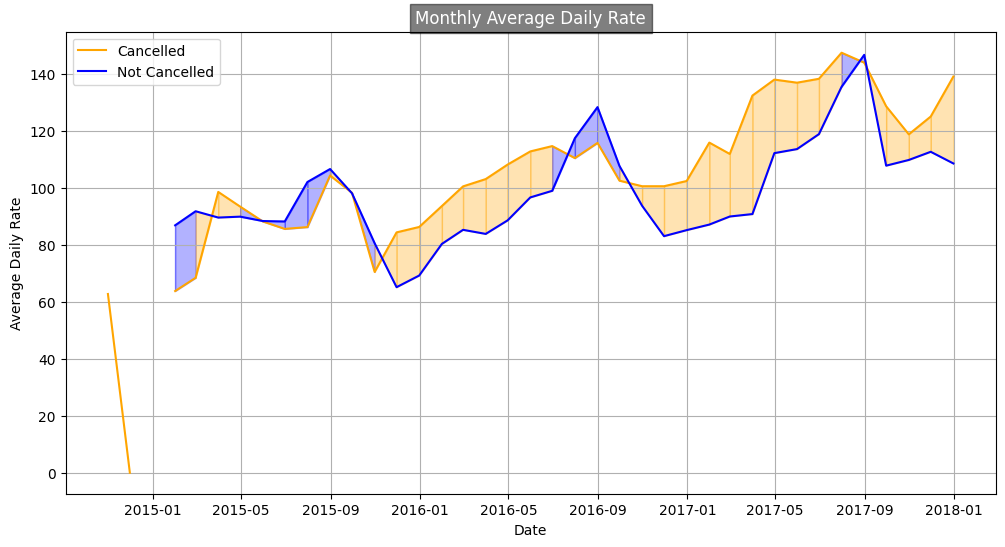

In [181]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'reservation_status_date' to datetime
cancelled_data['reservation_status_date'] = pd.to_datetime(cancelled_data['reservation_status_date'])
not_cancelled_data['reservation_status_date'] = pd.to_datetime(not_cancelled_data['reservation_status_date'])

# Resample and calculate monthly average ADR for cancelled bookings
cancelled_monthly_adr = cancelled_data.resample('M', on='reservation_status_date')['adr'].mean()

# Resample and calculate monthly average ADR for not cancelled bookings
not_cancelled_monthly_adr = not_cancelled_data.resample('M', on='reservation_status_date')['adr'].mean()

# Align indices
cancelled_monthly_adr, not_cancelled_monthly_adr = cancelled_monthly_adr.align(not_cancelled_monthly_adr, join='outer')

# Plotting the monthly average ADR trend with shaded area between the lines
plt.figure(figsize=(12, 6))
plt.title('Monthly Average Daily Rate', color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.plot(cancelled_monthly_adr.index, cancelled_monthly_adr.values, color='orange', label='Cancelled')
plt.plot(not_cancelled_monthly_adr.index, not_cancelled_monthly_adr.values, color='blue', label='Not Cancelled')

# Fill areas between lines with appropriate colors
for i in range(1, len(cancelled_monthly_adr)):
    if cancelled_monthly_adr.values[i] > not_cancelled_monthly_adr.values[i]:
        plt.fill_between(cancelled_monthly_adr.index[i-1:i+1], cancelled_monthly_adr.values[i-1:i+1], not_cancelled_monthly_adr.values[i-1:i+1], color='orange', alpha=0.3)
    else:
        plt.fill_between(cancelled_monthly_adr.index[i-1:i+1], cancelled_monthly_adr.values[i-1:i+1], not_cancelled_monthly_adr.values[i-1:i+1], color='blue', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Average Daily Rate')
plt.legend()
plt.grid(True)
plt.show()


*******************************************************************************************************************************

CONCLUSION

1. AS ONE CAN EE THE AREA OF CANCELLATION LINE - YELLOW IS LARGER THAN BLUE - NON CANCELLATION - MEANS CANCELLATION IS MORE BECAUSE OF HIGHER AVERAGE DAILY PRICE

*******************************************************************************************************************************

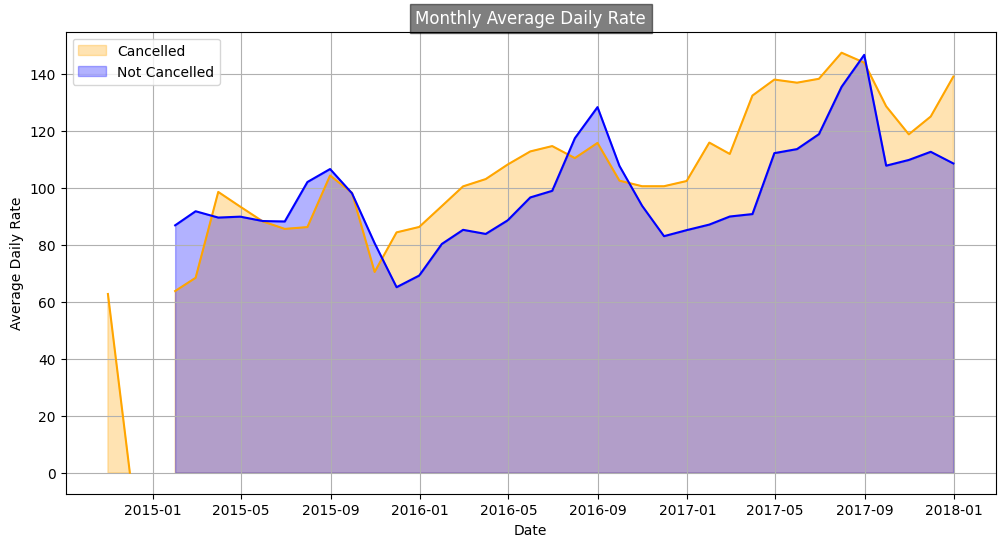

In [234]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'reservation_status_date' to datetime
cancelled_data['reservation_status_date'] = pd.to_datetime(cancelled_data['reservation_status_date'])
not_cancelled_data['reservation_status_date'] = pd.to_datetime(not_cancelled_data['reservation_status_date'])

# Resample and calculate monthly average ADR for cancelled bookings
cancelled_monthly_adr = cancelled_data.resample('M', on='reservation_status_date')['adr'].mean()

# Resample and calculate monthly average ADR for not cancelled bookings
not_cancelled_monthly_adr = not_cancelled_data.resample('M', on='reservation_status_date')['adr'].mean()

# Align indices
cancelled_monthly_adr, not_cancelled_monthly_adr = cancelled_monthly_adr.align(not_cancelled_monthly_adr, join='outer')

# Plotting the monthly average ADR trend with shaded area between the lines
plt.figure(figsize=(12, 6))
plt.title('Monthly Average Daily Rate', color="White", bbox={'facecolor':'black', 'alpha':0.5})
plt.fill_between(cancelled_monthly_adr.index, cancelled_monthly_adr.values, color='orange', alpha=0.3, label='Cancelled')
plt.fill_between(not_cancelled_monthly_adr.index, not_cancelled_monthly_adr.values, color='blue', alpha=0.3, label='Not Cancelled')

# Plot the lines for better visualization
plt.plot(cancelled_monthly_adr.index, cancelled_monthly_adr.values, color='orange')
plt.plot(not_cancelled_monthly_adr.index, not_cancelled_monthly_adr.values, color='blue')

plt.xlabel('Date')
plt.ylabel('Average Daily Rate')
plt.legend()
plt.grid(True)
plt.show()
